In [1]:
from deeprobust.graph.data import Dataset
from deeprobust.graph.defense import GCN
from deeprobust.graph.global_attack import Metattack
from deeprobust.graph.utils import preprocess, normalize_adj_tensor
import torch.optim as optim
import torch.nn.functional as F
from utils import *
from torch_geometric.utils import dense_to_sparse
from torch_geometric.nn.models import GAT

In [2]:
#If missing imports, clone https://github.com/ChandlerBang/pytorch-gnn-meta-attack
# Based on code from https://deeprobust.readthedocs.io/en/latest/source/deeprobust.graph.global_attack.html

In [3]:
# change name to pubmed or citeseer for those
data = Dataset(root='/tmp/', name='cora')
adj, features, labels = data.adj, data.features, data.labels
adj, features, labels = preprocess(adj, features, labels, preprocess_adj=False)
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test
idx_unlabeled = np.union1d(idx_val, idx_test)

Loading cora dataset...
Selecting 1 largest connected components


In [4]:
surrogate = GCN(nfeat=features.shape[1], nclass=labels.max().item()+1,
                nhid=16, dropout=0, with_relu=False, with_bias=False, device='cpu').to('cpu')
surrogate.fit(features, adj, labels, idx_train, idx_val, patience=30)
model = Metattack(surrogate, train_iters=10, nnodes=adj.shape[0], feature_shape=features.shape,
        attack_structure=True, attack_features=True, device='cpu', lambda_=0).to('cpu')

In [5]:
def attack_sweep(model, features, adj, labels, idx_train, idx_val, max_perturbations=100, step=10):
    mod_adjs = []
    idx = []

    for i in range(0, max_perturbations + 1, step):
        idx.append(i)
        
        model.attack(features, adj, labels, idx_train, idx_unlabeled, n_perturbations=i, ll_constraint=False)
        mod_adjs.append(model.modified_adj.clone())
        
    return mod_adjs, idx

In [6]:
modified_adjs, idxs = attack_sweep(model, features, adj, labels, idx_train, idx_val)

Perturbing graph: 0it [00:00, ?it/s]
Perturbing graph:   0%|                                  | 0/10 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.6825237274169922
GCN acc on unlabled data: 0.30442556995976755
attack loss: 1.6771175861358643


Perturbing graph:  10%|██▌                       | 1/10 [00:02<00:25,  2.81s/it]

GCN loss on unlabled data: 1.653085708618164
GCN acc on unlabled data: 0.5127402771569066
attack loss: 1.6495819091796875


Perturbing graph:  20%|█████▏                    | 2/10 [00:06<00:28,  3.54s/it]

GCN loss on unlabled data: 1.6671195030212402
GCN acc on unlabled data: 0.4421099687080912
attack loss: 1.6541646718978882


Perturbing graph:  30%|███████▊                  | 3/10 [00:11<00:29,  4.16s/it]

GCN loss on unlabled data: 1.6383451223373413
GCN acc on unlabled data: 0.4362986142154671
attack loss: 1.6271066665649414


Perturbing graph:  40%|██████████▍               | 4/10 [00:15<00:23,  3.84s/it]

GCN loss on unlabled data: 1.6870601177215576
GCN acc on unlabled data: 0.3871256146624944
attack loss: 1.6866233348846436


Perturbing graph:  50%|█████████████             | 5/10 [00:18<00:18,  3.61s/it]

GCN loss on unlabled data: 1.6656485795974731
GCN acc on unlabled data: 0.42869915064818953
attack loss: 1.6629797220230103


Perturbing graph:  60%|███████████████▌          | 6/10 [00:21<00:14,  3.61s/it]

GCN loss on unlabled data: 1.683498740196228
GCN acc on unlabled data: 0.36924452391595886
attack loss: 1.67757248878479


Perturbing graph:  70%|██████████████████▏       | 7/10 [00:25<00:11,  3.73s/it]

GCN loss on unlabled data: 1.787157416343689
GCN acc on unlabled data: 0.35851586946803754
attack loss: 1.7786215543746948


Perturbing graph:  80%|████████████████████▊     | 8/10 [00:29<00:07,  3.71s/it]

GCN loss on unlabled data: 1.7322391271591187
GCN acc on unlabled data: 0.3603039785426911
attack loss: 1.7315919399261475


Perturbing graph:  90%|███████████████████████▍  | 9/10 [00:32<00:03,  3.59s/it]

GCN loss on unlabled data: 1.7817431688308716
GCN acc on unlabled data: 0.36119803308001786
attack loss: 1.7723968029022217


Perturbing graph:   0%|                                  | 0/20 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.7126481533050537
GCN acc on unlabled data: 0.3844434510505141
attack loss: 1.710137963294983


Perturbing graph:   5%|█▎                        | 1/20 [00:03<01:00,  3.18s/it]

GCN loss on unlabled data: 1.6682950258255005
GCN acc on unlabled data: 0.34331694233348237
attack loss: 1.668030858039856


Perturbing graph:  10%|██▌                       | 2/20 [00:06<00:59,  3.30s/it]

GCN loss on unlabled data: 1.7120684385299683
GCN acc on unlabled data: 0.45015645954403216
attack loss: 1.7068216800689697


Perturbing graph:  15%|███▉                      | 3/20 [00:09<00:55,  3.25s/it]

GCN loss on unlabled data: 1.7373751401901245
GCN acc on unlabled data: 0.3276709879302637
attack loss: 1.7340303659439087


Perturbing graph:  20%|█████▏                    | 4/20 [00:12<00:51,  3.23s/it]

GCN loss on unlabled data: 1.7721911668777466
GCN acc on unlabled data: 0.3299061242735807
attack loss: 1.7743991613388062


Perturbing graph:  25%|██████▌                   | 5/20 [00:16<00:48,  3.26s/it]

GCN loss on unlabled data: 1.7740484476089478
GCN acc on unlabled data: 0.3339293696915512
attack loss: 1.7680257558822632


Perturbing graph:  30%|███████▊                  | 6/20 [00:19<00:45,  3.25s/it]

GCN loss on unlabled data: 1.6847829818725586
GCN acc on unlabled data: 0.4917299955297273
attack loss: 1.6887688636779785


Perturbing graph:  35%|█████████                 | 7/20 [00:22<00:42,  3.26s/it]

GCN loss on unlabled data: 1.6820048093795776
GCN acc on unlabled data: 0.44881537773804203
attack loss: 1.683940052986145


Perturbing graph:  40%|██████████▍               | 8/20 [00:26<00:39,  3.26s/it]

GCN loss on unlabled data: 1.704947590827942
GCN acc on unlabled data: 0.38801966919982117
attack loss: 1.7057477235794067


Perturbing graph:  45%|███████████▋              | 9/20 [00:29<00:35,  3.26s/it]

GCN loss on unlabled data: 1.715509057044983
GCN acc on unlabled data: 0.3965131873044256
attack loss: 1.7150020599365234


Perturbing graph:  50%|████████████▌            | 10/20 [00:32<00:32,  3.26s/it]

GCN loss on unlabled data: 1.6935752630233765
GCN acc on unlabled data: 0.4604380867232901
attack loss: 1.6834180355072021


Perturbing graph:  55%|█████████████▊           | 11/20 [00:35<00:29,  3.26s/it]

GCN loss on unlabled data: 1.7063056230545044
GCN acc on unlabled data: 0.41662941439427803
attack loss: 1.7027735710144043


Perturbing graph:  60%|███████████████          | 12/20 [00:39<00:26,  3.28s/it]

GCN loss on unlabled data: 1.6724339723587036
GCN acc on unlabled data: 0.46624944121591416
attack loss: 1.6676685810089111


Perturbing graph:  65%|████████████████▎        | 13/20 [00:42<00:22,  3.27s/it]

GCN loss on unlabled data: 1.6765943765640259
GCN acc on unlabled data: 0.38623156012516763
attack loss: 1.6785545349121094


Perturbing graph:  70%|█████████████████▌       | 14/20 [00:45<00:19,  3.30s/it]

GCN loss on unlabled data: 1.6487276554107666
GCN acc on unlabled data: 0.45596781403665626
attack loss: 1.6406941413879395


Perturbing graph:  75%|██████████████████▊      | 15/20 [00:49<00:16,  3.29s/it]

GCN loss on unlabled data: 1.740821361541748
GCN acc on unlabled data: 0.37863209655789004
attack loss: 1.7370330095291138


Perturbing graph:  80%|████████████████████     | 16/20 [00:52<00:13,  3.31s/it]

GCN loss on unlabled data: 1.768357753753662
GCN acc on unlabled data: 0.4202056325435852
attack loss: 1.7684859037399292


Perturbing graph:  85%|█████████████████████▎   | 17/20 [00:55<00:09,  3.30s/it]

GCN loss on unlabled data: 1.6977970600128174
GCN acc on unlabled data: 0.410818059901654
attack loss: 1.6922928094863892


Perturbing graph:  90%|██████████████████████▌  | 18/20 [00:58<00:06,  3.29s/it]

GCN loss on unlabled data: 1.670243740081787
GCN acc on unlabled data: 0.40143048725972286
attack loss: 1.6783217191696167


Perturbing graph:  95%|███████████████████████▊ | 19/20 [01:02<00:03,  3.32s/it]

GCN loss on unlabled data: 1.740138292312622
GCN acc on unlabled data: 0.34644613321412604
attack loss: 1.7264466285705566


Perturbing graph:   0%|                                  | 0/30 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.7092033624649048
GCN acc on unlabled data: 0.38801966919982117
attack loss: 1.7038904428482056


Perturbing graph:   3%|▊                         | 1/30 [00:03<01:34,  3.27s/it]

GCN loss on unlabled data: 1.7167919874191284
GCN acc on unlabled data: 0.4304872597228431
attack loss: 1.7116249799728394


Perturbing graph:   7%|█▋                        | 2/30 [00:06<01:31,  3.27s/it]

GCN loss on unlabled data: 1.7519104480743408
GCN acc on unlabled data: 0.3303531515422441
attack loss: 1.7554621696472168


Perturbing graph:  10%|██▌                       | 3/30 [00:09<01:29,  3.31s/it]

GCN loss on unlabled data: 1.7008123397827148
GCN acc on unlabled data: 0.37371479660259277
attack loss: 1.6970638036727905


Perturbing graph:  13%|███▍                      | 4/30 [00:13<01:25,  3.30s/it]

GCN loss on unlabled data: 1.6277257204055786
GCN acc on unlabled data: 0.47518998658918193
attack loss: 1.6239161491394043


Perturbing graph:  17%|████▎                     | 5/30 [00:16<01:23,  3.34s/it]

GCN loss on unlabled data: 1.7252774238586426
GCN acc on unlabled data: 0.4099240053643272
attack loss: 1.719067096710205


Perturbing graph:  20%|█████▏                    | 6/30 [00:19<01:19,  3.31s/it]

GCN loss on unlabled data: 1.7293965816497803
GCN acc on unlabled data: 0.3451050514081359
attack loss: 1.719457745552063


Perturbing graph:  23%|██████                    | 7/30 [00:23<01:15,  3.30s/it]

GCN loss on unlabled data: 1.7001460790634155
GCN acc on unlabled data: 0.410818059901654
attack loss: 1.6918574571609497


Perturbing graph:  27%|██████▉                   | 8/30 [00:26<01:13,  3.32s/it]

GCN loss on unlabled data: 1.708203911781311
GCN acc on unlabled data: 0.4345105051408136
attack loss: 1.7017297744750977


Perturbing graph:  30%|███████▊                  | 9/30 [00:29<01:09,  3.30s/it]

GCN loss on unlabled data: 1.743934988975525
GCN acc on unlabled data: 0.3459991059454627
attack loss: 1.739996075630188


Perturbing graph:  33%|████████▎                | 10/30 [00:33<01:05,  3.30s/it]

GCN loss on unlabled data: 1.7395267486572266
GCN acc on unlabled data: 0.39740724184175236
attack loss: 1.7449371814727783


Perturbing graph:  37%|█████████▏               | 11/30 [00:36<01:02,  3.29s/it]

GCN loss on unlabled data: 1.7372407913208008
GCN acc on unlabled data: 0.32409476978095664
attack loss: 1.731124758720398


Perturbing graph:  40%|██████████               | 12/30 [00:39<00:59,  3.33s/it]

GCN loss on unlabled data: 1.7212533950805664
GCN acc on unlabled data: 0.3938310236924452
attack loss: 1.7131645679473877


Perturbing graph:  43%|██████████▊              | 13/30 [00:43<00:56,  3.33s/it]

GCN loss on unlabled data: 1.6905537843704224
GCN acc on unlabled data: 0.42467590523021903
attack loss: 1.6889435052871704


Perturbing graph:  47%|███████████▋             | 14/30 [00:46<00:53,  3.32s/it]

GCN loss on unlabled data: 1.6884944438934326
GCN acc on unlabled data: 0.410818059901654
attack loss: 1.6786341667175293


Perturbing graph:  50%|████████████▌            | 15/30 [00:49<00:49,  3.31s/it]

GCN loss on unlabled data: 1.7837239503860474
GCN acc on unlabled data: 0.32275368797496645
attack loss: 1.7788559198379517


Perturbing graph:  53%|█████████████▎           | 16/30 [00:53<00:46,  3.32s/it]

GCN loss on unlabled data: 1.7482819557189941
GCN acc on unlabled data: 0.4260169870362092
attack loss: 1.744691252708435


Perturbing graph:  57%|██████████████▏          | 17/30 [00:56<00:43,  3.32s/it]

GCN loss on unlabled data: 1.6927706003189087
GCN acc on unlabled data: 0.44076888690210103
attack loss: 1.6882823705673218


Perturbing graph:  60%|███████████████          | 18/30 [00:59<00:39,  3.31s/it]

GCN loss on unlabled data: 1.6850615739822388
GCN acc on unlabled data: 0.36522127849798836
attack loss: 1.6808948516845703


Perturbing graph:  63%|███████████████▊         | 19/30 [01:02<00:36,  3.33s/it]

GCN loss on unlabled data: 1.7272571325302124
GCN acc on unlabled data: 0.3790791238265534
attack loss: 1.7204170227050781


Perturbing graph:  67%|████████████████▋        | 20/30 [01:06<00:33,  3.32s/it]

GCN loss on unlabled data: 1.7212854623794556
GCN acc on unlabled data: 0.35359856951274027
attack loss: 1.7187001705169678


Perturbing graph:  70%|█████████████████▌       | 21/30 [01:09<00:29,  3.30s/it]

GCN loss on unlabled data: 1.687456727027893
GCN acc on unlabled data: 0.4161823871256147
attack loss: 1.683261513710022


Perturbing graph:  73%|██████████████████▎      | 22/30 [01:13<00:27,  3.39s/it]

GCN loss on unlabled data: 1.7419319152832031
GCN acc on unlabled data: 0.36969155118462227
attack loss: 1.737293004989624


Perturbing graph:  77%|███████████████████▏     | 23/30 [01:16<00:23,  3.36s/it]

GCN loss on unlabled data: 1.7409138679504395
GCN acc on unlabled data: 0.3196244970943228
attack loss: 1.7357147932052612


Perturbing graph:  80%|████████████████████     | 24/30 [01:19<00:20,  3.33s/it]

GCN loss on unlabled data: 1.7634092569351196
GCN acc on unlabled data: 0.34018775145283864
attack loss: 1.7593715190887451


Perturbing graph:  83%|████████████████████▊    | 25/30 [01:22<00:16,  3.32s/it]

GCN loss on unlabled data: 1.7887647151947021
GCN acc on unlabled data: 0.42065265981224853
attack loss: 1.7867106199264526


Perturbing graph:  87%|█████████████████████▋   | 26/30 [01:26<00:13,  3.35s/it]

GCN loss on unlabled data: 1.7767796516418457
GCN acc on unlabled data: 0.32409476978095664
attack loss: 1.7711741924285889


Perturbing graph:  90%|██████████████████████▌  | 27/30 [01:29<00:09,  3.32s/it]

GCN loss on unlabled data: 1.6750919818878174
GCN acc on unlabled data: 0.4059007599463567
attack loss: 1.664527177810669


Perturbing graph:  93%|███████████████████████▎ | 28/30 [01:32<00:06,  3.32s/it]

GCN loss on unlabled data: 1.6973493099212646
GCN acc on unlabled data: 0.41707644166294144
attack loss: 1.6928843259811401


Perturbing graph:  97%|████████████████████████▏| 29/30 [01:36<00:03,  3.31s/it]

GCN loss on unlabled data: 1.742606282234192
GCN acc on unlabled data: 0.3276709879302637
attack loss: 1.737717628479004


Perturbing graph:   0%|                                  | 0/40 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.809162974357605
GCN acc on unlabled data: 0.3214126061689763
attack loss: 1.8093370199203491


Perturbing graph:   2%|▋                         | 1/40 [00:03<02:24,  3.70s/it]

GCN loss on unlabled data: 1.7329987287521362
GCN acc on unlabled data: 0.40098345999105944
attack loss: 1.733656644821167


Perturbing graph:   5%|█▎                        | 2/40 [00:07<02:15,  3.58s/it]

GCN loss on unlabled data: 1.7289543151855469
GCN acc on unlabled data: 0.4242288779615557
attack loss: 1.721869707107544


Perturbing graph:   8%|█▉                        | 3/40 [00:10<02:10,  3.53s/it]

GCN loss on unlabled data: 1.7389485836029053
GCN acc on unlabled data: 0.3156012516763523
attack loss: 1.7324436902999878


Perturbing graph:  10%|██▌                       | 4/40 [00:14<02:05,  3.48s/it]

GCN loss on unlabled data: 1.6921042203903198
GCN acc on unlabled data: 0.4228877961555655
attack loss: 1.6870174407958984


Perturbing graph:  12%|███▎                      | 5/40 [00:17<01:59,  3.40s/it]

GCN loss on unlabled data: 1.7119966745376587
GCN acc on unlabled data: 0.4720607957085382
attack loss: 1.7103346586227417


Perturbing graph:  15%|███▉                      | 6/40 [00:20<01:54,  3.36s/it]

GCN loss on unlabled data: 1.6919305324554443
GCN acc on unlabled data: 0.3562807331247206
attack loss: 1.685491919517517


Perturbing graph:  18%|████▌                     | 7/40 [00:23<01:49,  3.33s/it]

GCN loss on unlabled data: 1.6891125440597534
GCN acc on unlabled data: 0.38667858739383104
attack loss: 1.68158757686615


Perturbing graph:  20%|█████▏                    | 8/40 [00:27<01:46,  3.32s/it]

GCN loss on unlabled data: 1.7490434646606445
GCN acc on unlabled data: 0.39472507822977204
attack loss: 1.7429509162902832


Perturbing graph:  22%|█████▊                    | 9/40 [00:30<01:43,  3.34s/it]

GCN loss on unlabled data: 1.7434583902359009
GCN acc on unlabled data: 0.3370585605721949
attack loss: 1.7507861852645874


Perturbing graph:  25%|██████▎                  | 10/40 [00:34<01:41,  3.38s/it]

GCN loss on unlabled data: 1.8171205520629883
GCN acc on unlabled data: 0.3518104604380867
attack loss: 1.8186286687850952


Perturbing graph:  28%|██████▉                  | 11/40 [00:37<01:40,  3.45s/it]

GCN loss on unlabled data: 1.7624149322509766
GCN acc on unlabled data: 0.31515422440768887
attack loss: 1.7680132389068604


Perturbing graph:  30%|███████▌                 | 12/40 [00:40<01:34,  3.39s/it]

GCN loss on unlabled data: 1.7466853857040405
GCN acc on unlabled data: 0.3674564148413053
attack loss: 1.7405658960342407


Perturbing graph:  32%|████████▏                | 13/40 [00:44<01:30,  3.36s/it]

GCN loss on unlabled data: 1.7447301149368286
GCN acc on unlabled data: 0.29906124273580686
attack loss: 1.7325915098190308


Perturbing graph:  35%|████████▊                | 14/40 [00:48<01:34,  3.63s/it]

GCN loss on unlabled data: 1.7190405130386353
GCN acc on unlabled data: 0.3790791238265534
attack loss: 1.7110673189163208


Perturbing graph:  38%|█████████▍               | 15/40 [00:51<01:29,  3.57s/it]

GCN loss on unlabled data: 1.711588740348816
GCN acc on unlabled data: 0.38533750558784086
attack loss: 1.7094087600708008


Perturbing graph:  40%|██████████               | 16/40 [00:55<01:24,  3.54s/it]

GCN loss on unlabled data: 1.7096753120422363
GCN acc on unlabled data: 0.3831023692445239
attack loss: 1.7064155340194702


Perturbing graph:  42%|██████████▋              | 17/40 [00:59<01:22,  3.59s/it]

GCN loss on unlabled data: 1.7420399188995361
GCN acc on unlabled data: 0.3169423334823424
attack loss: 1.7333550453186035


Perturbing graph:  45%|███████████▎             | 18/40 [01:03<01:22,  3.73s/it]

GCN loss on unlabled data: 1.7406504154205322
GCN acc on unlabled data: 0.39606616003576217
attack loss: 1.7414162158966064


Perturbing graph:  48%|███████████▉             | 19/40 [01:06<01:16,  3.65s/it]

GCN loss on unlabled data: 1.662015438079834
GCN acc on unlabled data: 0.4099240053643272
attack loss: 1.6649434566497803


Perturbing graph:  50%|████████████▌            | 20/40 [01:09<01:09,  3.48s/it]

GCN loss on unlabled data: 1.7876075506210327
GCN acc on unlabled data: 0.2972731336611533
attack loss: 1.7818573713302612


Perturbing graph:  52%|█████████████▏           | 21/40 [01:12<01:04,  3.42s/it]

GCN loss on unlabled data: 1.7753223180770874
GCN acc on unlabled data: 0.3223066607063031
attack loss: 1.773045301437378


Perturbing graph:  55%|█████████████▊           | 22/40 [01:16<01:01,  3.44s/it]

GCN loss on unlabled data: 1.7365070581436157
GCN acc on unlabled data: 0.3263299061242736
attack loss: 1.7263022661209106


Perturbing graph:  57%|██████████████▎          | 23/40 [01:19<00:57,  3.39s/it]

GCN loss on unlabled data: 1.7576196193695068
GCN acc on unlabled data: 0.3303531515422441
attack loss: 1.753501057624817


Perturbing graph:  60%|███████████████          | 24/40 [01:23<00:55,  3.45s/it]

GCN loss on unlabled data: 1.706313967704773
GCN acc on unlabled data: 0.3790791238265534
attack loss: 1.7060105800628662


Perturbing graph:  62%|███████████████▋         | 25/40 [01:26<00:50,  3.38s/it]

GCN loss on unlabled data: 1.724027395248413
GCN acc on unlabled data: 0.3714796602592758
attack loss: 1.714129090309143


Perturbing graph:  65%|████████████████▎        | 26/40 [01:30<00:49,  3.51s/it]

GCN loss on unlabled data: 1.713588833808899
GCN acc on unlabled data: 0.410818059901654
attack loss: 1.706539511680603


Perturbing graph:  68%|████████████████▉        | 27/40 [01:33<00:45,  3.48s/it]

GCN loss on unlabled data: 1.7602016925811768
GCN acc on unlabled data: 0.3178363880196692
attack loss: 1.7541487216949463


Perturbing graph:  70%|█████████████████▌       | 28/40 [01:36<00:40,  3.41s/it]

GCN loss on unlabled data: 1.7688692808151245
GCN acc on unlabled data: 0.33527045149754137
attack loss: 1.7649827003479004


Perturbing graph:  72%|██████████████████▏      | 29/40 [01:42<00:44,  4.04s/it]

GCN loss on unlabled data: 1.7186038494110107
GCN acc on unlabled data: 0.3518104604380867
attack loss: 1.7069553136825562


Perturbing graph:  75%|██████████████████▊      | 30/40 [01:46<00:39,  3.99s/it]

GCN loss on unlabled data: 1.7644833326339722
GCN acc on unlabled data: 0.35449262405006704
attack loss: 1.7558783292770386


Perturbing graph:  78%|███████████████████▍     | 31/40 [01:49<00:34,  3.88s/it]

GCN loss on unlabled data: 1.7766313552856445
GCN acc on unlabled data: 0.3097898971837282
attack loss: 1.7750102281570435


Perturbing graph:  80%|████████████████████     | 32/40 [01:53<00:30,  3.76s/it]

GCN loss on unlabled data: 1.7735180854797363
GCN acc on unlabled data: 0.30710773357174787
attack loss: 1.7668311595916748


Perturbing graph:  82%|████████████████████▋    | 33/40 [01:56<00:25,  3.58s/it]

GCN loss on unlabled data: 1.7477840185165405
GCN acc on unlabled data: 0.3370585605721949
attack loss: 1.7406953573226929


Perturbing graph:  85%|█████████████████████▎   | 34/40 [01:59<00:20,  3.45s/it]

GCN loss on unlabled data: 1.726881742477417
GCN acc on unlabled data: 0.41171211443898076
attack loss: 1.7230250835418701


Perturbing graph:  88%|█████████████████████▉   | 35/40 [02:03<00:17,  3.55s/it]

GCN loss on unlabled data: 1.7982410192489624
GCN acc on unlabled data: 0.3142601698703621
attack loss: 1.7925270795822144


Perturbing graph:  90%|██████████████████████▌  | 36/40 [02:07<00:14,  3.60s/it]

GCN loss on unlabled data: 1.6892627477645874
GCN acc on unlabled data: 0.40366562360303976
attack loss: 1.6864992380142212


Perturbing graph:  92%|███████████████████████▏ | 37/40 [02:10<00:10,  3.60s/it]

GCN loss on unlabled data: 1.7476589679718018
GCN acc on unlabled data: 0.35225748770675014
attack loss: 1.7501095533370972


Perturbing graph:  95%|███████████████████████▊ | 38/40 [02:14<00:07,  3.57s/it]

GCN loss on unlabled data: 1.7615383863449097
GCN acc on unlabled data: 0.3209655789003129
attack loss: 1.7605141401290894


Perturbing graph:  98%|████████████████████████▍| 39/40 [02:17<00:03,  3.52s/it]

GCN loss on unlabled data: 1.7636414766311646
GCN acc on unlabled data: 0.3097898971837282
attack loss: 1.7609575986862183


Perturbing graph:   0%|                                  | 0/50 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.7483407258987427
GCN acc on unlabled data: 0.3620920876173447
attack loss: 1.7427058219909668


Perturbing graph:   2%|▌                         | 1/50 [00:03<02:42,  3.32s/it]

GCN loss on unlabled data: 1.7498431205749512
GCN acc on unlabled data: 0.40098345999105944
attack loss: 1.7481929063796997


Perturbing graph:   4%|█                         | 2/50 [00:06<02:44,  3.42s/it]

GCN loss on unlabled data: 1.738244891166687
GCN acc on unlabled data: 0.34644613321412604
attack loss: 1.736360788345337


Perturbing graph:   6%|█▌                        | 3/50 [00:10<02:42,  3.45s/it]

GCN loss on unlabled data: 1.7113622426986694
GCN acc on unlabled data: 0.33124720607957087
attack loss: 1.7158161401748657


Perturbing graph:   8%|██                        | 4/50 [00:13<02:39,  3.46s/it]

GCN loss on unlabled data: 1.758926272392273
GCN acc on unlabled data: 0.3513634331694233
attack loss: 1.7623183727264404


Perturbing graph:  10%|██▌                       | 5/50 [00:17<02:38,  3.51s/it]

GCN loss on unlabled data: 1.7629412412643433
GCN acc on unlabled data: 0.35359856951274027
attack loss: 1.7649985551834106


Perturbing graph:  12%|███                       | 6/50 [00:20<02:31,  3.44s/it]

GCN loss on unlabled data: 1.7220379114151
GCN acc on unlabled data: 0.41439427805096113
attack loss: 1.7130815982818604


Perturbing graph:  14%|███▋                      | 7/50 [00:23<02:25,  3.38s/it]

GCN loss on unlabled data: 1.7718368768692017
GCN acc on unlabled data: 0.37371479660259277
attack loss: 1.7703702449798584


Perturbing graph:  16%|████▏                     | 8/50 [00:27<02:22,  3.39s/it]

GCN loss on unlabled data: 1.7676564455032349
GCN acc on unlabled data: 0.3299061242735807
attack loss: 1.7640668153762817


Perturbing graph:  18%|████▋                     | 9/50 [00:30<02:20,  3.43s/it]

GCN loss on unlabled data: 1.7479650974273682
GCN acc on unlabled data: 0.3254358515869468
attack loss: 1.7355660200119019


Perturbing graph:  20%|█████                    | 10/50 [00:34<02:17,  3.45s/it]

GCN loss on unlabled data: 1.7502317428588867
GCN acc on unlabled data: 0.410818059901654
attack loss: 1.7551419734954834


Perturbing graph:  22%|█████▌                   | 11/50 [00:37<02:15,  3.47s/it]

GCN loss on unlabled data: 1.72324800491333
GCN acc on unlabled data: 0.37729101475189986
attack loss: 1.7227376699447632


Perturbing graph:  24%|██████                   | 12/50 [00:41<02:10,  3.43s/it]

GCN loss on unlabled data: 1.7608345746994019
GCN acc on unlabled data: 0.332588287885561
attack loss: 1.7554110288619995


Perturbing graph:  26%|██████▌                  | 13/50 [00:44<02:05,  3.38s/it]

GCN loss on unlabled data: 1.698330283164978
GCN acc on unlabled data: 0.41350022351363436
attack loss: 1.6956981420516968


Perturbing graph:  28%|███████                  | 14/50 [00:47<02:02,  3.39s/it]

GCN loss on unlabled data: 1.7649543285369873
GCN acc on unlabled data: 0.35091640590075995
attack loss: 1.769291639328003


Perturbing graph:  30%|███████▌                 | 15/50 [00:51<02:00,  3.45s/it]

GCN loss on unlabled data: 1.775554895401001
GCN acc on unlabled data: 0.3790791238265534
attack loss: 1.7767406702041626


Perturbing graph:  32%|████████                 | 16/50 [00:55<01:59,  3.52s/it]

GCN loss on unlabled data: 1.784010410308838
GCN acc on unlabled data: 0.39696021457308894
attack loss: 1.777640461921692


Perturbing graph:  34%|████████▌                | 17/50 [00:58<01:54,  3.48s/it]

GCN loss on unlabled data: 1.7428193092346191
GCN acc on unlabled data: 0.38936075100581136
attack loss: 1.7448441982269287


Perturbing graph:  36%|█████████                | 18/50 [01:02<01:51,  3.47s/it]

GCN loss on unlabled data: 1.729774832725525
GCN acc on unlabled data: 0.3674564148413053
attack loss: 1.720439076423645


Perturbing graph:  38%|█████████▌               | 19/50 [01:05<01:47,  3.47s/it]

GCN loss on unlabled data: 1.7639684677124023
GCN acc on unlabled data: 0.31649530621367905
attack loss: 1.760146141052246


Perturbing graph:  40%|██████████               | 20/50 [01:08<01:44,  3.48s/it]

GCN loss on unlabled data: 1.7276909351348877
GCN acc on unlabled data: 0.34644613321412604
attack loss: 1.721415400505066


Perturbing graph:  42%|██████████▌              | 21/50 [01:12<01:41,  3.49s/it]

GCN loss on unlabled data: 1.7337815761566162
GCN acc on unlabled data: 0.3571747876620474
attack loss: 1.731136441230774


Perturbing graph:  44%|███████████              | 22/50 [01:16<01:38,  3.53s/it]

GCN loss on unlabled data: 1.7766902446746826
GCN acc on unlabled data: 0.29906124273580686
attack loss: 1.7750452756881714


Perturbing graph:  46%|███████████▌             | 23/50 [01:19<01:34,  3.51s/it]

GCN loss on unlabled data: 1.7424640655517578
GCN acc on unlabled data: 0.40768886902101026
attack loss: 1.7434386014938354


Perturbing graph:  48%|████████████             | 24/50 [01:22<01:30,  3.47s/it]

GCN loss on unlabled data: 1.7537777423858643
GCN acc on unlabled data: 0.3294590970049173
attack loss: 1.748673439025879


Perturbing graph:  50%|████████████▌            | 25/50 [01:26<01:25,  3.44s/it]

GCN loss on unlabled data: 1.706080675125122
GCN acc on unlabled data: 0.36119803308001786
attack loss: 1.7021743059158325


Perturbing graph:  52%|█████████████            | 26/50 [01:29<01:23,  3.49s/it]

GCN loss on unlabled data: 1.7742829322814941
GCN acc on unlabled data: 0.3357174787662047
attack loss: 1.7722870111465454


Perturbing graph:  54%|█████████████▌           | 27/50 [01:33<01:22,  3.58s/it]

GCN loss on unlabled data: 1.7692134380340576
GCN acc on unlabled data: 0.3459991059454627
attack loss: 1.767109751701355


Perturbing graph:  56%|██████████████           | 28/50 [01:37<01:17,  3.51s/it]

GCN loss on unlabled data: 1.7849482297897339
GCN acc on unlabled data: 0.38891372373714794
attack loss: 1.788515329360962


Perturbing graph:  58%|██████████████▍          | 29/50 [01:40<01:11,  3.43s/it]

GCN loss on unlabled data: 1.7631332874298096
GCN acc on unlabled data: 0.38489047831917744
attack loss: 1.7591906785964966


Perturbing graph:  60%|███████████████          | 30/50 [01:43<01:06,  3.34s/it]

GCN loss on unlabled data: 1.7805976867675781
GCN acc on unlabled data: 0.29682610639248996
attack loss: 1.7836816310882568


Perturbing graph:  62%|███████████████▌         | 31/50 [01:46<01:01,  3.25s/it]

GCN loss on unlabled data: 1.735146403312683
GCN acc on unlabled data: 0.3500223513634332
attack loss: 1.7281302213668823


Perturbing graph:  64%|████████████████         | 32/50 [01:49<00:57,  3.18s/it]

GCN loss on unlabled data: 1.75395667552948
GCN acc on unlabled data: 0.40098345999105944
attack loss: 1.7514512538909912


Perturbing graph:  66%|████████████████▌        | 33/50 [01:52<00:53,  3.13s/it]

GCN loss on unlabled data: 1.7559138536453247
GCN acc on unlabled data: 0.3290120697362539
attack loss: 1.756218433380127


Perturbing graph:  68%|█████████████████        | 34/50 [01:55<00:49,  3.12s/it]

GCN loss on unlabled data: 1.7226930856704712
GCN acc on unlabled data: 0.38578453285650427
attack loss: 1.7252016067504883


Perturbing graph:  70%|█████████████████▌       | 35/50 [01:58<00:46,  3.13s/it]

GCN loss on unlabled data: 1.7084336280822754
GCN acc on unlabled data: 0.3701385784532856
attack loss: 1.7014702558517456


Perturbing graph:  72%|██████████████████       | 36/50 [02:01<00:44,  3.15s/it]

GCN loss on unlabled data: 1.7604141235351562
GCN acc on unlabled data: 0.36656236030397854
attack loss: 1.7587388753890991


Perturbing graph:  74%|██████████████████▌      | 37/50 [02:05<00:41,  3.22s/it]

GCN loss on unlabled data: 1.795019507408142
GCN acc on unlabled data: 0.33527045149754137
attack loss: 1.7930421829223633


Perturbing graph:  76%|███████████████████      | 38/50 [02:08<00:37,  3.16s/it]

GCN loss on unlabled data: 1.7249820232391357
GCN acc on unlabled data: 0.37863209655789004
attack loss: 1.7184205055236816


Perturbing graph:  78%|███████████████████▌     | 39/50 [02:11<00:34,  3.12s/it]

GCN loss on unlabled data: 1.7527252435684204
GCN acc on unlabled data: 0.3951721054984354
attack loss: 1.7534135580062866


Perturbing graph:  80%|████████████████████     | 40/50 [02:14<00:31,  3.11s/it]

GCN loss on unlabled data: 1.8087480068206787
GCN acc on unlabled data: 0.3169423334823424
attack loss: 1.8053560256958008


Perturbing graph:  82%|████████████████████▌    | 41/50 [02:17<00:28,  3.13s/it]

GCN loss on unlabled data: 1.8002859354019165
GCN acc on unlabled data: 0.3379526151095217
attack loss: 1.7977230548858643


Perturbing graph:  84%|█████████████████████    | 42/50 [02:21<00:25,  3.21s/it]

GCN loss on unlabled data: 1.7575048208236694
GCN acc on unlabled data: 0.3053196244970943
attack loss: 1.7536927461624146


Perturbing graph:  86%|█████████████████████▌   | 43/50 [02:24<00:22,  3.19s/it]

GCN loss on unlabled data: 1.7527085542678833
GCN acc on unlabled data: 0.4067948144836835
attack loss: 1.7468360662460327


Perturbing graph:  88%|██████████████████████   | 44/50 [02:27<00:18,  3.16s/it]

GCN loss on unlabled data: 1.7209876775741577
GCN acc on unlabled data: 0.3236477425122932
attack loss: 1.7155336141586304


Perturbing graph:  90%|██████████████████████▌  | 45/50 [02:30<00:15,  3.14s/it]

GCN loss on unlabled data: 1.7825161218643188
GCN acc on unlabled data: 0.30576665176575774
attack loss: 1.7808849811553955


Perturbing graph:  92%|███████████████████████  | 46/50 [02:33<00:12,  3.14s/it]

GCN loss on unlabled data: 1.7579377889633179
GCN acc on unlabled data: 0.4085829235583371
attack loss: 1.7674509286880493


Perturbing graph:  94%|███████████████████████▌ | 47/50 [02:36<00:09,  3.18s/it]

GCN loss on unlabled data: 1.7668989896774292
GCN acc on unlabled data: 0.3473401877514528
attack loss: 1.7674640417099


Perturbing graph:  96%|████████████████████████ | 48/50 [02:40<00:06,  3.28s/it]

GCN loss on unlabled data: 1.6848082542419434
GCN acc on unlabled data: 0.4005364327223961
attack loss: 1.6837339401245117


Perturbing graph:  98%|████████████████████████▌| 49/50 [02:43<00:03,  3.26s/it]

GCN loss on unlabled data: 1.7825844287872314
GCN acc on unlabled data: 0.34018775145283864
attack loss: 1.7761152982711792


Perturbing graph:   0%|                                  | 0/60 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.7617045640945435
GCN acc on unlabled data: 0.38667858739383104
attack loss: 1.7555893659591675


Perturbing graph:   2%|▍                         | 1/60 [00:02<02:56,  3.00s/it]

GCN loss on unlabled data: 1.795315146446228
GCN acc on unlabled data: 0.3723737147966026
attack loss: 1.7893835306167603


Perturbing graph:   3%|▊                         | 2/60 [00:06<03:05,  3.19s/it]

GCN loss on unlabled data: 1.7691818475723267
GCN acc on unlabled data: 0.28877961555654896
attack loss: 1.766943335533142


Perturbing graph:   5%|█▎                        | 3/60 [00:09<03:02,  3.20s/it]

GCN loss on unlabled data: 1.722392201423645
GCN acc on unlabled data: 0.3214126061689763
attack loss: 1.7167432308197021


Perturbing graph:   7%|█▋                        | 4/60 [00:12<02:57,  3.16s/it]

GCN loss on unlabled data: 1.776223063468933
GCN acc on unlabled data: 0.33527045149754137
attack loss: 1.7738021612167358


Perturbing graph:   8%|██▏                       | 5/60 [00:15<02:53,  3.15s/it]

GCN loss on unlabled data: 1.7515549659729004
GCN acc on unlabled data: 0.3598569512740277
attack loss: 1.740968942642212


Perturbing graph:  10%|██▌                       | 6/60 [00:18<02:50,  3.16s/it]

GCN loss on unlabled data: 1.723742127418518
GCN acc on unlabled data: 0.3924899418864551
attack loss: 1.7197986841201782


Perturbing graph:  12%|███                       | 7/60 [00:22<02:47,  3.15s/it]

GCN loss on unlabled data: 1.757444977760315
GCN acc on unlabled data: 0.32320071524362987
attack loss: 1.7536795139312744


Perturbing graph:  13%|███▍                      | 8/60 [00:25<02:42,  3.12s/it]

GCN loss on unlabled data: 1.7617535591125488
GCN acc on unlabled data: 0.40366562360303976
attack loss: 1.7594084739685059


Perturbing graph:  15%|███▉                      | 9/60 [00:29<02:52,  3.39s/it]

GCN loss on unlabled data: 1.7535347938537598
GCN acc on unlabled data: 0.40143048725972286
attack loss: 1.7497745752334595


Perturbing graph:  17%|████▏                    | 10/60 [00:34<03:14,  3.89s/it]

GCN loss on unlabled data: 1.810968279838562
GCN acc on unlabled data: 0.29101475189986586
attack loss: 1.8059656620025635


Perturbing graph:  18%|████▌                    | 11/60 [00:39<03:28,  4.26s/it]

GCN loss on unlabled data: 1.7711783647537231
GCN acc on unlabled data: 0.3634331694233348
attack loss: 1.7628132104873657


Perturbing graph:  20%|█████                    | 12/60 [00:44<03:35,  4.50s/it]

GCN loss on unlabled data: 1.7417291402816772
GCN acc on unlabled data: 0.3142601698703621
attack loss: 1.738548994064331


Perturbing graph:  22%|█████▍                   | 13/60 [00:48<03:21,  4.29s/it]

GCN loss on unlabled data: 1.7489567995071411
GCN acc on unlabled data: 0.3603039785426911
attack loss: 1.747358798980713


Perturbing graph:  23%|█████▊                   | 14/60 [00:51<03:07,  4.08s/it]

GCN loss on unlabled data: 1.7622064352035522
GCN acc on unlabled data: 0.3142601698703621
attack loss: 1.7584505081176758


Perturbing graph:  25%|██████▎                  | 15/60 [00:55<02:54,  3.87s/it]

GCN loss on unlabled data: 1.8025782108306885
GCN acc on unlabled data: 0.32409476978095664
attack loss: 1.7986401319503784


Perturbing graph:  27%|██████▋                  | 16/60 [00:58<02:44,  3.73s/it]

GCN loss on unlabled data: 1.6818888187408447
GCN acc on unlabled data: 0.39070183281180154
attack loss: 1.684088110923767


Perturbing graph:  28%|███████                  | 17/60 [01:02<02:43,  3.81s/it]

GCN loss on unlabled data: 1.725675344467163
GCN acc on unlabled data: 0.3562807331247206
attack loss: 1.7129433155059814


Perturbing graph:  30%|███████▌                 | 18/60 [01:06<02:41,  3.84s/it]

GCN loss on unlabled data: 1.7465816736221313
GCN acc on unlabled data: 0.38801966919982117
attack loss: 1.7390304803848267


Perturbing graph:  32%|███████▉                 | 19/60 [01:09<02:33,  3.75s/it]

GCN loss on unlabled data: 1.7039469480514526
GCN acc on unlabled data: 0.34555207867679927
attack loss: 1.6960757970809937


Perturbing graph:  33%|████████▎                | 20/60 [01:13<02:28,  3.72s/it]

GCN loss on unlabled data: 1.7216578722000122
GCN acc on unlabled data: 0.39830129637907913
attack loss: 1.7198400497436523


Perturbing graph:  35%|████████▊                | 21/60 [01:17<02:23,  3.68s/it]

GCN loss on unlabled data: 1.7195242643356323
GCN acc on unlabled data: 0.4304872597228431
attack loss: 1.723150610923767


Perturbing graph:  37%|█████████▏               | 22/60 [01:21<02:22,  3.74s/it]

GCN loss on unlabled data: 1.7243481874465942
GCN acc on unlabled data: 0.4282521233795262
attack loss: 1.7217286825180054


Perturbing graph:  38%|█████████▌               | 23/60 [01:24<02:17,  3.71s/it]

GCN loss on unlabled data: 1.7321778535842896
GCN acc on unlabled data: 0.3956191327670988
attack loss: 1.7287073135375977


Perturbing graph:  40%|██████████               | 24/60 [01:28<02:11,  3.67s/it]

GCN loss on unlabled data: 1.7953394651412964
GCN acc on unlabled data: 0.3169423334823424
attack loss: 1.7950271368026733


Perturbing graph:  42%|██████████▍              | 25/60 [01:32<02:10,  3.73s/it]

GCN loss on unlabled data: 1.805912733078003
GCN acc on unlabled data: 0.3156012516763523
attack loss: 1.8065305948257446


Perturbing graph:  43%|██████████▊              | 26/60 [01:35<02:04,  3.66s/it]

GCN loss on unlabled data: 1.7713993787765503
GCN acc on unlabled data: 0.30576665176575774
attack loss: 1.7638986110687256


Perturbing graph:  45%|███████████▎             | 27/60 [01:38<01:58,  3.58s/it]

GCN loss on unlabled data: 1.7862474918365479
GCN acc on unlabled data: 0.30308448815377736
attack loss: 1.7792887687683105


Perturbing graph:  47%|███████████▋             | 28/60 [01:42<01:52,  3.51s/it]

GCN loss on unlabled data: 1.7268661260604858
GCN acc on unlabled data: 0.3527045149754135
attack loss: 1.7210822105407715


Perturbing graph:  48%|████████████             | 29/60 [01:46<01:54,  3.70s/it]

GCN loss on unlabled data: 1.7802766561508179
GCN acc on unlabled data: 0.372820742065266
attack loss: 1.7823415994644165


Perturbing graph:  50%|████████████▌            | 30/60 [01:49<01:48,  3.63s/it]

GCN loss on unlabled data: 1.7396080493927002
GCN acc on unlabled data: 0.35449262405006704
attack loss: 1.7382384538650513


Perturbing graph:  52%|████████████▉            | 31/60 [01:53<01:43,  3.58s/it]

GCN loss on unlabled data: 1.7939831018447876
GCN acc on unlabled data: 0.2905677246312025
attack loss: 1.7914698123931885


Perturbing graph:  53%|█████████████▎           | 32/60 [01:56<01:39,  3.55s/it]

GCN loss on unlabled data: 1.763556957244873
GCN acc on unlabled data: 0.3334823424228878
attack loss: 1.7585386037826538


Perturbing graph:  55%|█████████████▊           | 33/60 [02:00<01:35,  3.53s/it]

GCN loss on unlabled data: 1.743680715560913
GCN acc on unlabled data: 0.3035315154224408
attack loss: 1.7339736223220825


Perturbing graph:  57%|██████████████▏          | 34/60 [02:03<01:30,  3.48s/it]

GCN loss on unlabled data: 1.7955188751220703
GCN acc on unlabled data: 0.29637907912382655
attack loss: 1.793047308921814


Perturbing graph:  58%|██████████████▌          | 35/60 [02:07<01:26,  3.45s/it]

GCN loss on unlabled data: 1.7217772006988525
GCN acc on unlabled data: 0.3884666964684846
attack loss: 1.7204868793487549


Perturbing graph:  60%|███████████████          | 36/60 [02:10<01:23,  3.48s/it]

GCN loss on unlabled data: 1.8425418138504028
GCN acc on unlabled data: 0.2744747429593205
attack loss: 1.839589238166809


Perturbing graph:  62%|███████████████▍         | 37/60 [02:14<01:19,  3.45s/it]

GCN loss on unlabled data: 1.8075716495513916
GCN acc on unlabled data: 0.3491282968261064
attack loss: 1.8100674152374268


Perturbing graph:  63%|███████████████▊         | 38/60 [02:17<01:15,  3.43s/it]

GCN loss on unlabled data: 1.8193804025650024
GCN acc on unlabled data: 0.2789450156459544
attack loss: 1.8128963708877563


Perturbing graph:  65%|████████████████▎        | 39/60 [02:20<01:11,  3.42s/it]

GCN loss on unlabled data: 1.7341092824935913
GCN acc on unlabled data: 0.32275368797496645
attack loss: 1.7361363172531128


Perturbing graph:  67%|████████████████▋        | 40/60 [02:24<01:09,  3.49s/it]

GCN loss on unlabled data: 1.7635612487792969
GCN acc on unlabled data: 0.332588287885561
attack loss: 1.7513104677200317


Perturbing graph:  68%|█████████████████        | 41/60 [02:27<01:06,  3.49s/it]

GCN loss on unlabled data: 1.8341609239578247
GCN acc on unlabled data: 0.2932498882431828
attack loss: 1.8383688926696777


Perturbing graph:  70%|█████████████████▌       | 42/60 [02:31<01:02,  3.48s/it]

GCN loss on unlabled data: 1.7807021141052246
GCN acc on unlabled data: 0.38265534197586054
attack loss: 1.780107855796814


Perturbing graph:  72%|█████████████████▉       | 43/60 [02:34<00:58,  3.45s/it]

GCN loss on unlabled data: 1.7713180780410767
GCN acc on unlabled data: 0.2932498882431828
attack loss: 1.7627350091934204


Perturbing graph:  73%|██████████████████▎      | 44/60 [02:38<00:54,  3.43s/it]

GCN loss on unlabled data: 1.8125932216644287
GCN acc on unlabled data: 0.29637907912382655
attack loss: 1.8063085079193115


Perturbing graph:  75%|██████████████████▊      | 45/60 [02:41<00:51,  3.44s/it]

GCN loss on unlabled data: 1.7829270362854004
GCN acc on unlabled data: 0.32722396066160037
attack loss: 1.779329776763916


Perturbing graph:  77%|███████████████████▏     | 46/60 [02:46<00:54,  3.91s/it]

GCN loss on unlabled data: 1.7692408561706543
GCN acc on unlabled data: 0.38667858739383104
attack loss: 1.7616806030273438


Perturbing graph:  78%|███████████████████▌     | 47/60 [02:50<00:48,  3.74s/it]

GCN loss on unlabled data: 1.7216005325317383
GCN acc on unlabled data: 0.33929369691551187
attack loss: 1.7179787158966064


Perturbing graph:  80%|████████████████████     | 48/60 [02:53<00:42,  3.56s/it]

GCN loss on unlabled data: 1.7495319843292236
GCN acc on unlabled data: 0.35359856951274027
attack loss: 1.74962317943573


Perturbing graph:  82%|████████████████████▍    | 49/60 [02:56<00:37,  3.43s/it]

GCN loss on unlabled data: 1.7909648418426514
GCN acc on unlabled data: 0.3580688421993742
attack loss: 1.7976244688034058


Perturbing graph:  83%|████████████████████▊    | 50/60 [02:59<00:33,  3.37s/it]

GCN loss on unlabled data: 1.7547779083251953
GCN acc on unlabled data: 0.32007152436298614
attack loss: 1.7561542987823486


Perturbing graph:  85%|█████████████████████▎   | 51/60 [03:02<00:29,  3.30s/it]

GCN loss on unlabled data: 1.7444283962249756
GCN acc on unlabled data: 0.3674564148413053
attack loss: 1.7455177307128906


Perturbing graph:  87%|█████████████████████▋   | 52/60 [03:05<00:25,  3.22s/it]

GCN loss on unlabled data: 1.769747018814087
GCN acc on unlabled data: 0.3598569512740277
attack loss: 1.767906665802002


Perturbing graph:  88%|██████████████████████   | 53/60 [03:08<00:22,  3.18s/it]

GCN loss on unlabled data: 1.7330760955810547
GCN acc on unlabled data: 0.35762181493071077
attack loss: 1.7276793718338013


Perturbing graph:  90%|██████████████████████▌  | 54/60 [03:11<00:18,  3.15s/it]

GCN loss on unlabled data: 1.719321370124817
GCN acc on unlabled data: 0.35449262405006704
attack loss: 1.712414264678955


Perturbing graph:  92%|██████████████████████▉  | 55/60 [03:14<00:15,  3.15s/it]

GCN loss on unlabled data: 1.7797951698303223
GCN acc on unlabled data: 0.29101475189986586
attack loss: 1.7731977701187134


Perturbing graph:  93%|███████████████████████▎ | 56/60 [03:18<00:12,  3.17s/it]

GCN loss on unlabled data: 1.7854281663894653
GCN acc on unlabled data: 0.3683504693786321
attack loss: 1.7894524335861206


Perturbing graph:  95%|███████████████████████▊ | 57/60 [03:21<00:09,  3.16s/it]

GCN loss on unlabled data: 1.7959117889404297
GCN acc on unlabled data: 0.36700938757264195
attack loss: 1.793129563331604


Perturbing graph:  97%|████████████████████████▏| 58/60 [03:24<00:06,  3.13s/it]

GCN loss on unlabled data: 1.785639762878418
GCN acc on unlabled data: 0.2981671881984801
attack loss: 1.7766975164413452


Perturbing graph:  98%|████████████████████████▌| 59/60 [03:27<00:03,  3.11s/it]

GCN loss on unlabled data: 1.7675188779830933
GCN acc on unlabled data: 0.34018775145283864
attack loss: 1.7560356855392456


Perturbing graph:   0%|                                  | 0/70 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.7748044729232788
GCN acc on unlabled data: 0.3513634331694233
attack loss: 1.7716090679168701


Perturbing graph:   1%|▎                         | 1/70 [00:03<03:32,  3.08s/it]

GCN loss on unlabled data: 1.741621971130371
GCN acc on unlabled data: 0.3571747876620474
attack loss: 1.7472832202911377


Perturbing graph:   3%|▋                         | 2/70 [00:06<03:32,  3.12s/it]

GCN loss on unlabled data: 1.8005462884902954
GCN acc on unlabled data: 0.35359856951274027
attack loss: 1.806519627571106


Perturbing graph:   4%|█                         | 3/70 [00:09<03:30,  3.15s/it]

GCN loss on unlabled data: 1.755345106124878
GCN acc on unlabled data: 0.30710773357174787
attack loss: 1.7499223947525024


Perturbing graph:   6%|█▍                        | 4/70 [00:12<03:26,  3.13s/it]

GCN loss on unlabled data: 1.7895326614379883
GCN acc on unlabled data: 0.3102369244523916
attack loss: 1.7872318029403687


Perturbing graph:   7%|█▊                        | 5/70 [00:15<03:22,  3.11s/it]

GCN loss on unlabled data: 1.7647353410720825
GCN acc on unlabled data: 0.3634331694233348
attack loss: 1.7636305093765259


Perturbing graph:   9%|██▏                       | 6/70 [00:18<03:17,  3.09s/it]

GCN loss on unlabled data: 1.7725292444229126
GCN acc on unlabled data: 0.33214126061689764
attack loss: 1.771557331085205


Perturbing graph:  10%|██▌                       | 7/70 [00:21<03:15,  3.10s/it]

GCN loss on unlabled data: 1.789650321006775
GCN acc on unlabled data: 0.36164506034868127
attack loss: 1.788596272468567


Perturbing graph:  11%|██▉                       | 8/70 [00:24<03:13,  3.12s/it]

GCN loss on unlabled data: 1.7592166662216187
GCN acc on unlabled data: 0.38131426016987036
attack loss: 1.7530195713043213


Perturbing graph:  13%|███▎                      | 9/70 [00:28<03:10,  3.13s/it]

GCN loss on unlabled data: 1.803681492805481
GCN acc on unlabled data: 0.2986142154671435
attack loss: 1.8013464212417603


Perturbing graph:  14%|███▌                     | 10/70 [00:31<03:08,  3.15s/it]

GCN loss on unlabled data: 1.727066159248352
GCN acc on unlabled data: 0.38533750558784086
attack loss: 1.7287400960922241


Perturbing graph:  16%|███▉                     | 11/70 [00:34<03:05,  3.15s/it]

GCN loss on unlabled data: 1.7983077764511108
GCN acc on unlabled data: 0.31515422440768887
attack loss: 1.8019473552703857


Perturbing graph:  17%|████▎                    | 12/70 [00:37<03:03,  3.16s/it]

GCN loss on unlabled data: 1.7911286354064941
GCN acc on unlabled data: 0.34644613321412604
attack loss: 1.782289743423462


Perturbing graph:  19%|████▋                    | 13/70 [00:40<03:02,  3.21s/it]

GCN loss on unlabled data: 1.7867540121078491
GCN acc on unlabled data: 0.3075547608404113
attack loss: 1.7814960479736328


Perturbing graph:  20%|█████                    | 14/70 [00:44<02:59,  3.20s/it]

GCN loss on unlabled data: 1.7489140033721924
GCN acc on unlabled data: 0.3598569512740277
attack loss: 1.7467842102050781


Perturbing graph:  21%|█████▎                   | 15/70 [00:47<02:56,  3.20s/it]

GCN loss on unlabled data: 1.7587970495224
GCN acc on unlabled data: 0.3491282968261064
attack loss: 1.758638620376587


Perturbing graph:  23%|█████▋                   | 16/70 [00:50<02:52,  3.19s/it]

GCN loss on unlabled data: 1.752062439918518
GCN acc on unlabled data: 0.39025480554313813
attack loss: 1.7529147863388062


Perturbing graph:  24%|██████                   | 17/70 [00:53<02:49,  3.20s/it]

GCN loss on unlabled data: 1.7861934900283813
GCN acc on unlabled data: 0.348681269557443
attack loss: 1.7778244018554688


Perturbing graph:  26%|██████▍                  | 18/70 [00:56<02:44,  3.17s/it]

GCN loss on unlabled data: 1.744829535484314
GCN acc on unlabled data: 0.3844434510505141
attack loss: 1.7382198572158813


Perturbing graph:  27%|██████▊                  | 19/70 [00:59<02:39,  3.12s/it]

GCN loss on unlabled data: 1.735852837562561
GCN acc on unlabled data: 0.3075547608404113
attack loss: 1.7290161848068237


Perturbing graph:  29%|███████▏                 | 20/70 [01:02<02:35,  3.11s/it]

GCN loss on unlabled data: 1.8036307096481323
GCN acc on unlabled data: 0.2811801519892713
attack loss: 1.7886872291564941


Perturbing graph:  30%|███████▌                 | 21/70 [01:06<02:33,  3.14s/it]

GCN loss on unlabled data: 1.7559846639633179
GCN acc on unlabled data: 0.40545373267769336
attack loss: 1.751720666885376


Perturbing graph:  31%|███████▊                 | 22/70 [01:09<02:31,  3.15s/it]

GCN loss on unlabled data: 1.7966734170913696
GCN acc on unlabled data: 0.3290120697362539
attack loss: 1.7977877855300903


Perturbing graph:  33%|████████▏                | 23/70 [01:12<02:28,  3.17s/it]

GCN loss on unlabled data: 1.780190110206604
GCN acc on unlabled data: 0.34421099687080914
attack loss: 1.777860403060913


Perturbing graph:  34%|████████▌                | 24/70 [01:15<02:27,  3.20s/it]

GCN loss on unlabled data: 1.7614820003509521
GCN acc on unlabled data: 0.3330353151542244
attack loss: 1.7628247737884521


Perturbing graph:  36%|████████▉                | 25/70 [01:19<02:33,  3.41s/it]

GCN loss on unlabled data: 1.7647908926010132
GCN acc on unlabled data: 0.30308448815377736
attack loss: 1.7599968910217285


Perturbing graph:  37%|█████████▎               | 26/70 [01:23<02:35,  3.53s/it]

GCN loss on unlabled data: 1.7829509973526
GCN acc on unlabled data: 0.34823424228877964
attack loss: 1.7842849493026733


Perturbing graph:  39%|█████████▋               | 27/70 [01:27<02:36,  3.63s/it]

GCN loss on unlabled data: 1.7670124769210815
GCN acc on unlabled data: 0.30084935181046046
attack loss: 1.762721061706543


Perturbing graph:  40%|██████████               | 28/70 [01:31<02:37,  3.74s/it]

GCN loss on unlabled data: 1.7746994495391846
GCN acc on unlabled data: 0.35762181493071077
attack loss: 1.7743443250656128


Perturbing graph:  41%|██████████▎              | 29/70 [01:34<02:31,  3.68s/it]

GCN loss on unlabled data: 1.7701287269592285
GCN acc on unlabled data: 0.3218596334376397
attack loss: 1.767756700515747


Perturbing graph:  43%|██████████▋              | 30/70 [01:38<02:20,  3.52s/it]

GCN loss on unlabled data: 1.7460983991622925
GCN acc on unlabled data: 0.34152883325882877
attack loss: 1.7430521249771118


Perturbing graph:  44%|███████████              | 31/70 [01:41<02:12,  3.40s/it]

GCN loss on unlabled data: 1.7696279287338257
GCN acc on unlabled data: 0.3316942333482342
attack loss: 1.771419644355774


Perturbing graph:  46%|███████████▍             | 32/70 [01:44<02:05,  3.30s/it]

GCN loss on unlabled data: 1.7494158744812012
GCN acc on unlabled data: 0.33124720607957087
attack loss: 1.7501393556594849


Perturbing graph:  47%|███████████▊             | 33/70 [01:47<02:00,  3.24s/it]

GCN loss on unlabled data: 1.751204252243042
GCN acc on unlabled data: 0.3075547608404113
attack loss: 1.7557682991027832


Perturbing graph:  49%|████████████▏            | 34/70 [01:50<01:56,  3.24s/it]

GCN loss on unlabled data: 1.788922905921936
GCN acc on unlabled data: 0.3451050514081359
attack loss: 1.7851465940475464


Perturbing graph:  50%|████████████▌            | 35/70 [01:53<01:52,  3.22s/it]

GCN loss on unlabled data: 1.7523910999298096
GCN acc on unlabled data: 0.3446580241394725
attack loss: 1.7457855939865112


Perturbing graph:  51%|████████████▊            | 36/70 [01:57<01:51,  3.29s/it]

GCN loss on unlabled data: 1.8286209106445312
GCN acc on unlabled data: 0.3169423334823424
attack loss: 1.8273652791976929


Perturbing graph:  53%|█████████████▏           | 37/70 [02:00<01:46,  3.23s/it]

GCN loss on unlabled data: 1.7739958763122559
GCN acc on unlabled data: 0.3156012516763523
attack loss: 1.770039677619934


Perturbing graph:  54%|█████████████▌           | 38/70 [02:03<01:41,  3.18s/it]

GCN loss on unlabled data: 1.8248653411865234
GCN acc on unlabled data: 0.30308448815377736
attack loss: 1.8201420307159424


Perturbing graph:  56%|█████████████▉           | 39/70 [02:06<01:38,  3.17s/it]

GCN loss on unlabled data: 1.8172014951705933
GCN acc on unlabled data: 0.38176128743853377
attack loss: 1.8166663646697998


Perturbing graph:  57%|██████████████▎          | 40/70 [02:09<01:35,  3.17s/it]

GCN loss on unlabled data: 1.7560780048370361
GCN acc on unlabled data: 0.3437639696021457
attack loss: 1.753563642501831


Perturbing graph:  59%|██████████████▋          | 41/70 [02:12<01:31,  3.16s/it]

GCN loss on unlabled data: 1.787894606590271
GCN acc on unlabled data: 0.348681269557443
attack loss: 1.7785110473632812


Perturbing graph:  60%|███████████████          | 42/70 [02:15<01:27,  3.13s/it]

GCN loss on unlabled data: 1.784374713897705
GCN acc on unlabled data: 0.34689316048278945
attack loss: 1.7797584533691406


Perturbing graph:  61%|███████████████▎         | 43/70 [02:18<01:23,  3.09s/it]

GCN loss on unlabled data: 1.7968069314956665
GCN acc on unlabled data: 0.3062136790344211
attack loss: 1.7978951930999756


Perturbing graph:  63%|███████████████▋         | 44/70 [02:21<01:19,  3.07s/it]

GCN loss on unlabled data: 1.779508113861084
GCN acc on unlabled data: 0.29280286097451946
attack loss: 1.7834622859954834


Perturbing graph:  64%|████████████████         | 45/70 [02:24<01:16,  3.07s/it]

GCN loss on unlabled data: 1.7759652137756348
GCN acc on unlabled data: 0.3513634331694233
attack loss: 1.7720218896865845


Perturbing graph:  66%|████████████████▍        | 46/70 [02:28<01:14,  3.11s/it]

GCN loss on unlabled data: 1.766322374343872
GCN acc on unlabled data: 0.3303531515422441
attack loss: 1.757558822631836


Perturbing graph:  67%|████████████████▊        | 47/70 [02:31<01:12,  3.13s/it]

GCN loss on unlabled data: 1.77786386013031
GCN acc on unlabled data: 0.3419758605274922
attack loss: 1.7732727527618408


Perturbing graph:  69%|█████████████████▏       | 48/70 [02:34<01:09,  3.14s/it]

GCN loss on unlabled data: 1.7284998893737793
GCN acc on unlabled data: 0.33616450603486814
attack loss: 1.7254538536071777


Perturbing graph:  70%|█████████████████▌       | 49/70 [02:37<01:05,  3.12s/it]

GCN loss on unlabled data: 1.7837508916854858
GCN acc on unlabled data: 0.3316942333482342
attack loss: 1.7850042581558228


Perturbing graph:  71%|█████████████████▊       | 50/70 [02:40<01:03,  3.17s/it]

GCN loss on unlabled data: 1.7371962070465088
GCN acc on unlabled data: 0.36969155118462227
attack loss: 1.732478380203247


Perturbing graph:  73%|██████████████████▏      | 51/70 [02:43<01:00,  3.17s/it]

GCN loss on unlabled data: 1.7440111637115479
GCN acc on unlabled data: 0.3473401877514528
attack loss: 1.7407844066619873


Perturbing graph:  74%|██████████████████▌      | 52/70 [02:47<00:56,  3.15s/it]

GCN loss on unlabled data: 1.7600547075271606
GCN acc on unlabled data: 0.3871256146624944
attack loss: 1.7654720544815063


Perturbing graph:  76%|██████████████████▉      | 53/70 [02:50<00:53,  3.15s/it]

GCN loss on unlabled data: 1.7662181854248047
GCN acc on unlabled data: 0.3437639696021457
attack loss: 1.7575740814208984


Perturbing graph:  77%|███████████████████▎     | 54/70 [02:53<00:51,  3.25s/it]

GCN loss on unlabled data: 1.6938371658325195
GCN acc on unlabled data: 0.41305319624497094
attack loss: 1.6905556917190552


Perturbing graph:  79%|███████████████████▋     | 55/70 [02:56<00:48,  3.22s/it]

GCN loss on unlabled data: 1.8023219108581543
GCN acc on unlabled data: 0.29682610639248996
attack loss: 1.8080693483352661


Perturbing graph:  80%|████████████████████     | 56/70 [02:59<00:44,  3.16s/it]

GCN loss on unlabled data: 1.745474934577942
GCN acc on unlabled data: 0.30397854269110414
attack loss: 1.745579719543457


Perturbing graph:  81%|████████████████████▎    | 57/70 [03:02<00:40,  3.12s/it]

GCN loss on unlabled data: 1.8196159601211548
GCN acc on unlabled data: 0.32811801519892714
attack loss: 1.8130260705947876


Perturbing graph:  83%|████████████████████▋    | 58/70 [03:06<00:37,  3.11s/it]

GCN loss on unlabled data: 1.744174599647522
GCN acc on unlabled data: 0.3357174787662047
attack loss: 1.744065523147583


Perturbing graph:  84%|█████████████████████    | 59/70 [03:09<00:34,  3.12s/it]

GCN loss on unlabled data: 1.8008222579956055
GCN acc on unlabled data: 0.2941439427805096
attack loss: 1.7936174869537354


Perturbing graph:  86%|█████████████████████▍   | 60/70 [03:12<00:31,  3.15s/it]

GCN loss on unlabled data: 1.777997374534607
GCN acc on unlabled data: 0.33616450603486814
attack loss: 1.771218180656433


Perturbing graph:  87%|█████████████████████▊   | 61/70 [03:15<00:29,  3.28s/it]

GCN loss on unlabled data: 1.7954301834106445
GCN acc on unlabled data: 0.2954850245864998
attack loss: 1.7920504808425903


Perturbing graph:  89%|██████████████████████▏  | 62/70 [03:19<00:26,  3.33s/it]

GCN loss on unlabled data: 1.7491281032562256
GCN acc on unlabled data: 0.3263299061242736
attack loss: 1.7478123903274536


Perturbing graph:  90%|██████████████████████▌  | 63/70 [03:22<00:23,  3.32s/it]

GCN loss on unlabled data: 1.7471503019332886
GCN acc on unlabled data: 0.36119803308001786
attack loss: 1.7477866411209106


Perturbing graph:  91%|██████████████████████▊  | 64/70 [03:25<00:19,  3.29s/it]

GCN loss on unlabled data: 1.7679107189178467
GCN acc on unlabled data: 0.31649530621367905
attack loss: 1.7621831893920898


Perturbing graph:  93%|███████████████████████▏ | 65/70 [03:29<00:16,  3.26s/it]

GCN loss on unlabled data: 1.838332176208496
GCN acc on unlabled data: 0.30308448815377736
attack loss: 1.835986852645874


Perturbing graph:  94%|███████████████████████▌ | 66/70 [03:32<00:12,  3.24s/it]

GCN loss on unlabled data: 1.7448877096176147
GCN acc on unlabled data: 0.31247206079570855
attack loss: 1.7470483779907227


Perturbing graph:  96%|███████████████████████▉ | 67/70 [03:35<00:09,  3.22s/it]

GCN loss on unlabled data: 1.7782844305038452
GCN acc on unlabled data: 0.33080017881090745
attack loss: 1.7730213403701782


Perturbing graph:  97%|████████████████████████▎| 68/70 [03:38<00:06,  3.17s/it]

GCN loss on unlabled data: 1.7834208011627197
GCN acc on unlabled data: 0.28967367009387573
attack loss: 1.7827987670898438


Perturbing graph:  99%|████████████████████████▋| 69/70 [03:41<00:03,  3.14s/it]

GCN loss on unlabled data: 1.7735819816589355
GCN acc on unlabled data: 0.4072418417523469
attack loss: 1.7734758853912354


Perturbing graph:   0%|                                  | 0/80 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.7678982019424438
GCN acc on unlabled data: 0.3115780062583818
attack loss: 1.7605699300765991


Perturbing graph:   1%|▎                         | 1/80 [00:03<04:03,  3.08s/it]

GCN loss on unlabled data: 1.7876046895980835
GCN acc on unlabled data: 0.3285650424675905
attack loss: 1.7795555591583252


Perturbing graph:   2%|▋                         | 2/80 [00:06<04:08,  3.19s/it]

GCN loss on unlabled data: 1.7934845685958862
GCN acc on unlabled data: 0.32677693339293695
attack loss: 1.7882176637649536


Perturbing graph:   4%|▉                         | 3/80 [00:09<04:06,  3.20s/it]

GCN loss on unlabled data: 1.8035005331039429
GCN acc on unlabled data: 0.36164506034868127
attack loss: 1.803043007850647


Perturbing graph:   5%|█▎                        | 4/80 [00:13<04:11,  3.31s/it]

GCN loss on unlabled data: 1.7595912218093872
GCN acc on unlabled data: 0.2932498882431828
attack loss: 1.7575290203094482


Perturbing graph:   6%|█▋                        | 5/80 [00:16<04:00,  3.21s/it]

GCN loss on unlabled data: 1.7689863443374634
GCN acc on unlabled data: 0.3723737147966026
attack loss: 1.7609747648239136


Perturbing graph:   8%|█▉                        | 6/80 [00:19<03:52,  3.14s/it]

GCN loss on unlabled data: 1.8006612062454224
GCN acc on unlabled data: 0.31202503352704514
attack loss: 1.7992609739303589


Perturbing graph:   9%|██▎                       | 7/80 [00:22<03:48,  3.13s/it]

GCN loss on unlabled data: 1.760797142982483
GCN acc on unlabled data: 0.36298614215467145
attack loss: 1.758025050163269


Perturbing graph:  10%|██▌                       | 8/80 [00:25<03:45,  3.13s/it]

GCN loss on unlabled data: 1.7678440809249878
GCN acc on unlabled data: 0.29235583370585605
attack loss: 1.766951560974121


Perturbing graph:  11%|██▉                       | 9/80 [00:28<03:43,  3.15s/it]

GCN loss on unlabled data: 1.7381062507629395
GCN acc on unlabled data: 0.3299061242735807
attack loss: 1.7357181310653687


Perturbing graph:  12%|███▏                     | 10/80 [00:31<03:40,  3.14s/it]

GCN loss on unlabled data: 1.8118594884872437
GCN acc on unlabled data: 0.3303531515422441
attack loss: 1.8124563694000244


Perturbing graph:  14%|███▍                     | 11/80 [00:34<03:34,  3.11s/it]

GCN loss on unlabled data: 1.7784709930419922
GCN acc on unlabled data: 0.3285650424675905
attack loss: 1.770385503768921


Perturbing graph:  15%|███▊                     | 12/80 [00:37<03:29,  3.08s/it]

GCN loss on unlabled data: 1.7161657810211182
GCN acc on unlabled data: 0.372820742065266
attack loss: 1.7159565687179565


Perturbing graph:  16%|████                     | 13/80 [00:40<03:26,  3.08s/it]

GCN loss on unlabled data: 1.777038812637329
GCN acc on unlabled data: 0.28967367009387573
attack loss: 1.7710412740707397


Perturbing graph:  18%|████▍                    | 14/80 [00:43<03:23,  3.09s/it]

GCN loss on unlabled data: 1.79776132106781
GCN acc on unlabled data: 0.3446580241394725
attack loss: 1.798399806022644


Perturbing graph:  19%|████▋                    | 15/80 [00:47<03:22,  3.12s/it]

GCN loss on unlabled data: 1.7426636219024658
GCN acc on unlabled data: 0.35851586946803754
attack loss: 1.7381092309951782


Perturbing graph:  20%|█████                    | 16/80 [00:50<03:20,  3.14s/it]

GCN loss on unlabled data: 1.7458138465881348
GCN acc on unlabled data: 0.3254358515869468
attack loss: 1.739630937576294


Perturbing graph:  21%|█████▎                   | 17/80 [00:53<03:17,  3.13s/it]

GCN loss on unlabled data: 1.743190884590149
GCN acc on unlabled data: 0.31202503352704514
attack loss: 1.7369645833969116


Perturbing graph:  22%|█████▋                   | 18/80 [00:56<03:16,  3.17s/it]

GCN loss on unlabled data: 1.7017083168029785
GCN acc on unlabled data: 0.38980777827447477
attack loss: 1.6962001323699951


Perturbing graph:  24%|█████▉                   | 19/80 [00:59<03:12,  3.15s/it]

GCN loss on unlabled data: 1.7309534549713135
GCN acc on unlabled data: 0.39204291461779167
attack loss: 1.7327101230621338


Perturbing graph:  25%|██████▎                  | 20/80 [01:02<03:08,  3.14s/it]

GCN loss on unlabled data: 1.768675684928894
GCN acc on unlabled data: 0.3088958426464014
attack loss: 1.7651057243347168


Perturbing graph:  26%|██████▌                  | 21/80 [01:05<03:05,  3.14s/it]

GCN loss on unlabled data: 1.7725409269332886
GCN acc on unlabled data: 0.3634331694233348
attack loss: 1.7716811895370483


Perturbing graph:  28%|██████▉                  | 22/80 [01:09<03:03,  3.16s/it]

GCN loss on unlabled data: 1.7998173236846924
GCN acc on unlabled data: 0.2869915064818954
attack loss: 1.7902756929397583


Perturbing graph:  29%|███████▏                 | 23/80 [01:12<03:00,  3.17s/it]

GCN loss on unlabled data: 1.812341570854187
GCN acc on unlabled data: 0.3357174787662047
attack loss: 1.809531569480896


Perturbing graph:  30%|███████▌                 | 24/80 [01:15<02:56,  3.15s/it]

GCN loss on unlabled data: 1.743874430656433
GCN acc on unlabled data: 0.3397407241841752
attack loss: 1.7417834997177124


Perturbing graph:  31%|███████▊                 | 25/80 [01:18<02:51,  3.12s/it]

GCN loss on unlabled data: 1.761626124382019
GCN acc on unlabled data: 0.35359856951274027
attack loss: 1.7605271339416504


Perturbing graph:  32%|████████▏                | 26/80 [01:21<02:47,  3.10s/it]

GCN loss on unlabled data: 1.7820771932601929
GCN acc on unlabled data: 0.3330353151542244
attack loss: 1.7806373834609985


Perturbing graph:  34%|████████▍                | 27/80 [01:24<02:46,  3.14s/it]

GCN loss on unlabled data: 1.7689399719238281
GCN acc on unlabled data: 0.3316942333482342
attack loss: 1.7695549726486206


Perturbing graph:  35%|████████▊                | 28/80 [01:27<02:43,  3.15s/it]

GCN loss on unlabled data: 1.7924710512161255
GCN acc on unlabled data: 0.3741618238712561
attack loss: 1.7924120426177979


Perturbing graph:  36%|█████████                | 29/80 [01:31<02:41,  3.16s/it]

GCN loss on unlabled data: 1.793639063835144
GCN acc on unlabled data: 0.30710773357174787
attack loss: 1.7930513620376587


Perturbing graph:  38%|█████████▍               | 30/80 [01:34<02:37,  3.15s/it]

GCN loss on unlabled data: 1.7675113677978516
GCN acc on unlabled data: 0.2954850245864998
attack loss: 1.7670252323150635


Perturbing graph:  39%|█████████▋               | 31/80 [01:37<02:33,  3.12s/it]

GCN loss on unlabled data: 1.8266863822937012
GCN acc on unlabled data: 0.2954850245864998
attack loss: 1.8247987031936646


Perturbing graph:  40%|██████████               | 32/80 [01:40<02:28,  3.10s/it]

GCN loss on unlabled data: 1.7767610549926758
GCN acc on unlabled data: 0.30800178810907464
attack loss: 1.7721925973892212


Perturbing graph:  41%|██████████▎              | 33/80 [01:43<02:25,  3.10s/it]

GCN loss on unlabled data: 1.8068196773529053
GCN acc on unlabled data: 0.3021904336164506
attack loss: 1.8028960227966309


Perturbing graph:  42%|██████████▋              | 34/80 [01:46<02:22,  3.11s/it]

GCN loss on unlabled data: 1.736647367477417
GCN acc on unlabled data: 0.3214126061689763
attack loss: 1.7324984073638916


Perturbing graph:  44%|██████████▉              | 35/80 [01:49<02:21,  3.14s/it]

GCN loss on unlabled data: 1.756880283355713
GCN acc on unlabled data: 0.35359856951274027
attack loss: 1.752917766571045


Perturbing graph:  45%|███████████▎             | 36/80 [01:52<02:18,  3.14s/it]

GCN loss on unlabled data: 1.7972326278686523
GCN acc on unlabled data: 0.3759499329459097
attack loss: 1.7916282415390015


Perturbing graph:  46%|███████████▌             | 37/80 [01:56<02:14,  3.14s/it]

GCN loss on unlabled data: 1.7912298440933228
GCN acc on unlabled data: 0.35493965131873045
attack loss: 1.7910399436950684


Perturbing graph:  48%|███████████▉             | 38/80 [01:59<02:10,  3.11s/it]

GCN loss on unlabled data: 1.7814857959747314
GCN acc on unlabled data: 0.3097898971837282
attack loss: 1.7807214260101318


Perturbing graph:  49%|████████████▏            | 39/80 [02:02<02:06,  3.09s/it]

GCN loss on unlabled data: 1.7867913246154785
GCN acc on unlabled data: 0.3723737147966026
attack loss: 1.7825701236724854


Perturbing graph:  50%|████████████▌            | 40/80 [02:05<02:03,  3.10s/it]

GCN loss on unlabled data: 1.7316900491714478
GCN acc on unlabled data: 0.3182834152883326
attack loss: 1.7286494970321655


Perturbing graph:  51%|████████████▊            | 41/80 [02:08<02:01,  3.13s/it]

GCN loss on unlabled data: 1.7995259761810303
GCN acc on unlabled data: 0.3214126061689763
attack loss: 1.7982358932495117


Perturbing graph:  52%|█████████████▏           | 42/80 [02:12<02:08,  3.37s/it]

GCN loss on unlabled data: 1.7992655038833618
GCN acc on unlabled data: 0.2986142154671435
attack loss: 1.7952924966812134


Perturbing graph:  54%|█████████████▍           | 43/80 [02:15<02:03,  3.32s/it]

GCN loss on unlabled data: 1.7164244651794434
GCN acc on unlabled data: 0.42780509611086276
attack loss: 1.7098528146743774


Perturbing graph:  55%|█████████████▊           | 44/80 [02:18<01:56,  3.24s/it]

GCN loss on unlabled data: 1.725195288658142
GCN acc on unlabled data: 0.380867232901207
attack loss: 1.7160654067993164


Perturbing graph:  56%|██████████████           | 45/80 [02:21<01:51,  3.18s/it]

GCN loss on unlabled data: 1.758554458618164
GCN acc on unlabled data: 0.35493965131873045
attack loss: 1.7563129663467407


Perturbing graph:  57%|██████████████▎          | 46/80 [02:24<01:46,  3.14s/it]

GCN loss on unlabled data: 1.7668507099151611
GCN acc on unlabled data: 0.36298614215467145
attack loss: 1.755250334739685


Perturbing graph:  59%|██████████████▋          | 47/80 [02:27<01:43,  3.14s/it]

GCN loss on unlabled data: 1.8144221305847168
GCN acc on unlabled data: 0.30576665176575774
attack loss: 1.8105368614196777


Perturbing graph:  60%|███████████████          | 48/80 [02:31<01:41,  3.17s/it]

GCN loss on unlabled data: 1.8154600858688354
GCN acc on unlabled data: 0.2852033974072418
attack loss: 1.8178694248199463


Perturbing graph:  61%|███████████████▎         | 49/80 [02:34<01:38,  3.16s/it]

GCN loss on unlabled data: 1.8085596561431885
GCN acc on unlabled data: 0.3518104604380867
attack loss: 1.8084248304367065


Perturbing graph:  62%|███████████████▋         | 50/80 [02:37<01:34,  3.14s/it]

GCN loss on unlabled data: 1.7890748977661133
GCN acc on unlabled data: 0.3012963790791238
attack loss: 1.7712479829788208


Perturbing graph:  64%|███████████████▉         | 51/80 [02:40<01:30,  3.11s/it]

GCN loss on unlabled data: 1.7724543809890747
GCN acc on unlabled data: 0.3357174787662047
attack loss: 1.7713266611099243


Perturbing graph:  65%|████████████████▎        | 52/80 [02:43<01:26,  3.08s/it]

GCN loss on unlabled data: 1.8118237257003784
GCN acc on unlabled data: 0.35851586946803754
attack loss: 1.8111927509307861


Perturbing graph:  66%|████████████████▌        | 53/80 [02:46<01:23,  3.10s/it]

GCN loss on unlabled data: 1.7823054790496826
GCN acc on unlabled data: 0.3594099240053643
attack loss: 1.7835403680801392


Perturbing graph:  68%|████████████████▉        | 54/80 [02:49<01:21,  3.13s/it]

GCN loss on unlabled data: 1.7891552448272705
GCN acc on unlabled data: 0.30308448815377736
attack loss: 1.7851481437683105


Perturbing graph:  69%|█████████████████▏       | 55/80 [02:53<01:19,  3.19s/it]

GCN loss on unlabled data: 1.836095929145813
GCN acc on unlabled data: 0.2954850245864998
attack loss: 1.8322513103485107


Perturbing graph:  70%|█████████████████▌       | 56/80 [02:56<01:16,  3.18s/it]

GCN loss on unlabled data: 1.7771092653274536
GCN acc on unlabled data: 0.3093428699150648
attack loss: 1.7772551774978638


Perturbing graph:  71%|█████████████████▊       | 57/80 [02:59<01:12,  3.14s/it]

GCN loss on unlabled data: 1.8359624147415161
GCN acc on unlabled data: 0.29369691551184623
attack loss: 1.8363550901412964


Perturbing graph:  72%|██████████████████▏      | 58/80 [03:02<01:08,  3.10s/it]

GCN loss on unlabled data: 1.727084755897522
GCN acc on unlabled data: 0.39696021457308894
attack loss: 1.7215989828109741


Perturbing graph:  74%|██████████████████▍      | 59/80 [03:05<01:05,  3.10s/it]

GCN loss on unlabled data: 1.780023217201233
GCN acc on unlabled data: 0.29280286097451946
attack loss: 1.7771178483963013


Perturbing graph:  75%|██████████████████▊      | 60/80 [03:08<01:02,  3.11s/it]

GCN loss on unlabled data: 1.732014775276184
GCN acc on unlabled data: 0.3258828788556102
attack loss: 1.7218586206436157


Perturbing graph:  76%|███████████████████      | 61/80 [03:11<00:59,  3.14s/it]

GCN loss on unlabled data: 1.8114224672317505
GCN acc on unlabled data: 0.3102369244523916
attack loss: 1.796168565750122


Perturbing graph:  78%|███████████████████▍     | 62/80 [03:14<00:56,  3.14s/it]

GCN loss on unlabled data: 1.771479845046997
GCN acc on unlabled data: 0.34555207867679927
attack loss: 1.76854407787323


Perturbing graph:  79%|███████████████████▋     | 63/80 [03:18<00:53,  3.12s/it]

GCN loss on unlabled data: 1.7597068548202515
GCN acc on unlabled data: 0.2995082700044703
attack loss: 1.759514331817627


Perturbing graph:  80%|████████████████████     | 64/80 [03:21<00:49,  3.09s/it]

GCN loss on unlabled data: 1.811689853668213
GCN acc on unlabled data: 0.3115780062583818
attack loss: 1.8045789003372192


Perturbing graph:  81%|████████████████████▎    | 65/80 [03:24<00:46,  3.09s/it]

GCN loss on unlabled data: 1.8068385124206543
GCN acc on unlabled data: 0.2914617791685293
attack loss: 1.8037714958190918


Perturbing graph:  82%|████████████████████▋    | 66/80 [03:27<00:43,  3.11s/it]

GCN loss on unlabled data: 1.7657086849212646
GCN acc on unlabled data: 0.3334823424228878
attack loss: 1.7594685554504395


Perturbing graph:  84%|████████████████████▉    | 67/80 [03:30<00:41,  3.18s/it]

GCN loss on unlabled data: 1.8170530796051025
GCN acc on unlabled data: 0.3263299061242736
attack loss: 1.8173630237579346


Perturbing graph:  85%|█████████████████████▎   | 68/80 [03:33<00:38,  3.17s/it]

GCN loss on unlabled data: 1.8020554780960083
GCN acc on unlabled data: 0.36969155118462227
attack loss: 1.8037142753601074


Perturbing graph:  86%|█████████████████████▌   | 69/80 [03:36<00:34,  3.14s/it]

GCN loss on unlabled data: 1.778208613395691
GCN acc on unlabled data: 0.3370585605721949
attack loss: 1.7738046646118164


Perturbing graph:  88%|█████████████████████▉   | 70/80 [03:39<00:31,  3.11s/it]

GCN loss on unlabled data: 1.8016012907028198
GCN acc on unlabled data: 0.3012963790791238
attack loss: 1.8037731647491455


Perturbing graph:  89%|██████████████████████▏  | 71/80 [03:42<00:27,  3.10s/it]

GCN loss on unlabled data: 1.8115482330322266
GCN acc on unlabled data: 0.28833258828788555
attack loss: 1.7977362871170044


Perturbing graph:  90%|██████████████████████▌  | 72/80 [03:46<00:24,  3.12s/it]

GCN loss on unlabled data: 1.7783153057098389
GCN acc on unlabled data: 0.31649530621367905
attack loss: 1.768471360206604


Perturbing graph:  91%|██████████████████████▊  | 73/80 [03:49<00:22,  3.16s/it]

GCN loss on unlabled data: 1.8254560232162476
GCN acc on unlabled data: 0.28877961555654896
attack loss: 1.8232898712158203


Perturbing graph:  92%|███████████████████████▏ | 74/80 [03:52<00:18,  3.16s/it]

GCN loss on unlabled data: 1.793002963066101
GCN acc on unlabled data: 0.3357174787662047
attack loss: 1.795130968093872


Perturbing graph:  94%|███████████████████████▍ | 75/80 [03:55<00:15,  3.14s/it]

GCN loss on unlabled data: 1.7682921886444092
GCN acc on unlabled data: 0.3491282968261064
attack loss: 1.7635588645935059


Perturbing graph:  95%|███████████████████████▊ | 76/80 [03:58<00:12,  3.10s/it]

GCN loss on unlabled data: 1.779304027557373
GCN acc on unlabled data: 0.348681269557443
attack loss: 1.777445673942566


Perturbing graph:  96%|████████████████████████ | 77/80 [04:01<00:09,  3.09s/it]

GCN loss on unlabled data: 1.8211655616760254
GCN acc on unlabled data: 0.3097898971837282
attack loss: 1.819734811782837


Perturbing graph:  98%|████████████████████████▍| 78/80 [04:04<00:06,  3.10s/it]

GCN loss on unlabled data: 1.7744344472885132
GCN acc on unlabled data: 0.30710773357174787
attack loss: 1.7764599323272705


Perturbing graph:  99%|████████████████████████▋| 79/80 [04:08<00:03,  3.15s/it]

GCN loss on unlabled data: 1.7870608568191528
GCN acc on unlabled data: 0.3679034421099687
attack loss: 1.7865387201309204


Perturbing graph:   0%|                                  | 0/90 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.8004851341247559
GCN acc on unlabled data: 0.29682610639248996
attack loss: 1.796584963798523


Perturbing graph:   1%|▎                         | 1/90 [00:03<04:33,  3.08s/it]

GCN loss on unlabled data: 1.817731261253357
GCN acc on unlabled data: 0.2834152883325883
attack loss: 1.810697317123413


Perturbing graph:   2%|▌                         | 2/90 [00:06<04:27,  3.03s/it]

GCN loss on unlabled data: 1.71312415599823
GCN acc on unlabled data: 0.31917746982565937
attack loss: 1.7041417360305786


Perturbing graph:   3%|▊                         | 3/90 [00:09<04:24,  3.04s/it]

GCN loss on unlabled data: 1.7773133516311646
GCN acc on unlabled data: 0.34644613321412604
attack loss: 1.7771075963974


Perturbing graph:   4%|█▏                        | 4/90 [00:12<04:24,  3.08s/it]

GCN loss on unlabled data: 1.8136564493179321
GCN acc on unlabled data: 0.3021904336164506
attack loss: 1.8134398460388184


Perturbing graph:   6%|█▍                        | 5/90 [00:15<04:24,  3.12s/it]

GCN loss on unlabled data: 1.7851942777633667
GCN acc on unlabled data: 0.3661153330353151
attack loss: 1.7824519872665405


Perturbing graph:   7%|█▋                        | 6/90 [00:18<04:22,  3.13s/it]

GCN loss on unlabled data: 1.7513638734817505
GCN acc on unlabled data: 0.32007152436298614
attack loss: 1.7526179552078247


Perturbing graph:   8%|██                        | 7/90 [00:21<04:22,  3.16s/it]

GCN loss on unlabled data: 1.834265112876892
GCN acc on unlabled data: 0.2986142154671435
attack loss: 1.8370306491851807


Perturbing graph:   9%|██▎                       | 8/90 [00:24<04:15,  3.12s/it]

GCN loss on unlabled data: 1.7929614782333374
GCN acc on unlabled data: 0.3258828788556102
attack loss: 1.7885254621505737


Perturbing graph:  10%|██▌                       | 9/90 [00:27<04:12,  3.12s/it]

GCN loss on unlabled data: 1.8122951984405518
GCN acc on unlabled data: 0.2860974519445686
attack loss: 1.8076350688934326


Perturbing graph:  11%|██▊                      | 10/90 [00:31<04:13,  3.17s/it]

GCN loss on unlabled data: 1.8151780366897583
GCN acc on unlabled data: 0.28877961555654896
attack loss: 1.8142651319503784


Perturbing graph:  12%|███                      | 11/90 [00:34<04:10,  3.17s/it]

GCN loss on unlabled data: 1.7846143245697021
GCN acc on unlabled data: 0.3075547608404113
attack loss: 1.7806919813156128


Perturbing graph:  13%|███▎                     | 12/90 [00:37<04:08,  3.18s/it]

GCN loss on unlabled data: 1.7986994981765747
GCN acc on unlabled data: 0.3303531515422441
attack loss: 1.7935155630111694


Perturbing graph:  14%|███▌                     | 13/90 [00:40<04:04,  3.17s/it]

GCN loss on unlabled data: 1.7892118692398071
GCN acc on unlabled data: 0.3021904336164506
attack loss: 1.7861026525497437


Perturbing graph:  16%|███▉                     | 14/90 [00:43<03:57,  3.13s/it]

GCN loss on unlabled data: 1.8480544090270996
GCN acc on unlabled data: 0.2954850245864998
attack loss: 1.8455228805541992


Perturbing graph:  17%|████▏                    | 15/90 [00:46<03:52,  3.10s/it]

GCN loss on unlabled data: 1.7843809127807617
GCN acc on unlabled data: 0.31515422440768887
attack loss: 1.775599479675293


Perturbing graph:  18%|████▍                    | 16/90 [00:49<03:48,  3.09s/it]

GCN loss on unlabled data: 1.8228574991226196
GCN acc on unlabled data: 0.30800178810907464
attack loss: 1.8171496391296387


Perturbing graph:  19%|████▋                    | 17/90 [00:53<03:47,  3.11s/it]

GCN loss on unlabled data: 1.7744817733764648
GCN acc on unlabled data: 0.32051855163164955
attack loss: 1.7746340036392212


Perturbing graph:  20%|█████                    | 18/90 [00:56<03:46,  3.14s/it]

GCN loss on unlabled data: 1.8105707168579102
GCN acc on unlabled data: 0.23781850692892267
attack loss: 1.807261347770691


Perturbing graph:  21%|█████▎                   | 19/90 [00:59<03:43,  3.15s/it]

GCN loss on unlabled data: 1.7293022871017456
GCN acc on unlabled data: 0.36119803308001786
attack loss: 1.7266061305999756


Perturbing graph:  22%|█████▌                   | 20/90 [01:02<03:39,  3.13s/it]

GCN loss on unlabled data: 1.796757459640503
GCN acc on unlabled data: 0.2901206973625391
attack loss: 1.7912960052490234


Perturbing graph:  23%|█████▊                   | 21/90 [01:05<03:39,  3.17s/it]

GCN loss on unlabled data: 1.7868632078170776
GCN acc on unlabled data: 0.32677693339293695
attack loss: 1.7784966230392456


Perturbing graph:  24%|██████                   | 22/90 [01:08<03:32,  3.13s/it]

GCN loss on unlabled data: 1.798218846321106
GCN acc on unlabled data: 0.3142601698703621
attack loss: 1.7887089252471924


Perturbing graph:  26%|██████▍                  | 23/90 [01:11<03:29,  3.12s/it]

GCN loss on unlabled data: 1.754112720489502
GCN acc on unlabled data: 0.38131426016987036
attack loss: 1.747154951095581


Perturbing graph:  27%|██████▋                  | 24/90 [01:15<03:26,  3.13s/it]

GCN loss on unlabled data: 1.7363917827606201
GCN acc on unlabled data: 0.35449262405006704
attack loss: 1.7338614463806152


Perturbing graph:  28%|██████▉                  | 25/90 [01:18<03:24,  3.15s/it]

GCN loss on unlabled data: 1.8085739612579346
GCN acc on unlabled data: 0.2981671881984801
attack loss: 1.80681574344635


Perturbing graph:  29%|███████▏                 | 26/90 [01:21<03:21,  3.14s/it]

GCN loss on unlabled data: 1.8033561706542969
GCN acc on unlabled data: 0.2892266428252123
attack loss: 1.7963042259216309


Perturbing graph:  30%|███████▌                 | 27/90 [01:24<03:16,  3.11s/it]

GCN loss on unlabled data: 1.7096861600875854
GCN acc on unlabled data: 0.4452391595887349
attack loss: 1.7141622304916382


Perturbing graph:  31%|███████▊                 | 28/90 [01:27<03:11,  3.08s/it]

GCN loss on unlabled data: 1.7933142185211182
GCN acc on unlabled data: 0.3133661153330353
attack loss: 1.7919385433197021


Perturbing graph:  32%|████████                 | 29/90 [01:30<03:07,  3.08s/it]

GCN loss on unlabled data: 1.754095435142517
GCN acc on unlabled data: 0.3156012516763523
attack loss: 1.752197027206421


Perturbing graph:  33%|████████▎                | 30/90 [01:33<03:06,  3.10s/it]

GCN loss on unlabled data: 1.7921420335769653
GCN acc on unlabled data: 0.2731336611533304
attack loss: 1.7883864641189575


Perturbing graph:  34%|████████▌                | 31/90 [01:36<03:05,  3.14s/it]

GCN loss on unlabled data: 1.80459463596344
GCN acc on unlabled data: 0.29906124273580686
attack loss: 1.8001108169555664


Perturbing graph:  36%|████████▉                | 32/90 [01:40<03:03,  3.16s/it]

GCN loss on unlabled data: 1.7936663627624512
GCN acc on unlabled data: 0.3133661153330353
attack loss: 1.7884888648986816


Perturbing graph:  37%|█████████▏               | 33/90 [01:43<02:58,  3.14s/it]

GCN loss on unlabled data: 1.7973575592041016
GCN acc on unlabled data: 0.31649530621367905
attack loss: 1.7970302104949951


Perturbing graph:  38%|█████████▍               | 34/90 [01:46<02:53,  3.10s/it]

GCN loss on unlabled data: 1.7615834474563599
GCN acc on unlabled data: 0.34421099687080914
attack loss: 1.7601088285446167


Perturbing graph:  39%|█████████▋               | 35/90 [01:49<02:49,  3.09s/it]

GCN loss on unlabled data: 1.7947856187820435
GCN acc on unlabled data: 0.30174340634778724
attack loss: 1.7953096628189087


Perturbing graph:  40%|██████████               | 36/90 [01:52<02:46,  3.09s/it]

GCN loss on unlabled data: 1.7699347734451294
GCN acc on unlabled data: 0.3316942333482342
attack loss: 1.7732607126235962


Perturbing graph:  41%|██████████▎              | 37/90 [01:55<02:45,  3.12s/it]

GCN loss on unlabled data: 1.772607445716858
GCN acc on unlabled data: 0.33482342422887795
attack loss: 1.7736968994140625


Perturbing graph:  42%|██████████▌              | 38/90 [01:58<02:44,  3.16s/it]

GCN loss on unlabled data: 1.7685399055480957
GCN acc on unlabled data: 0.36566830576665177
attack loss: 1.766929030418396


Perturbing graph:  43%|██████████▊              | 39/90 [02:02<02:47,  3.28s/it]

GCN loss on unlabled data: 1.7962936162948608
GCN acc on unlabled data: 0.2874385337505588
attack loss: 1.7907391786575317


Perturbing graph:  44%|███████████              | 40/90 [02:05<02:41,  3.22s/it]

GCN loss on unlabled data: 1.7118152379989624
GCN acc on unlabled data: 0.3330353151542244
attack loss: 1.7079576253890991


Perturbing graph:  46%|███████████▍             | 41/90 [02:08<02:34,  3.16s/it]

GCN loss on unlabled data: 1.788394570350647
GCN acc on unlabled data: 0.31873044255699595
attack loss: 1.7884371280670166


Perturbing graph:  47%|███████████▋             | 42/90 [02:11<02:30,  3.13s/it]

GCN loss on unlabled data: 1.7865486145019531
GCN acc on unlabled data: 0.28833258828788555
attack loss: 1.7818896770477295


Perturbing graph:  48%|███████████▉             | 43/90 [02:14<02:27,  3.13s/it]

GCN loss on unlabled data: 1.8153682947158813
GCN acc on unlabled data: 0.3209655789003129
attack loss: 1.817708969116211


Perturbing graph:  49%|████████████▏            | 44/90 [02:17<02:24,  3.15s/it]

GCN loss on unlabled data: 1.7462111711502075
GCN acc on unlabled data: 0.3477872150201162
attack loss: 1.745652437210083


Perturbing graph:  50%|████████████▌            | 45/90 [02:21<02:21,  3.15s/it]

GCN loss on unlabled data: 1.7992476224899292
GCN acc on unlabled data: 0.29772016092981674
attack loss: 1.7866512537002563


Perturbing graph:  51%|████████████▊            | 46/90 [02:24<02:17,  3.12s/it]

GCN loss on unlabled data: 1.7711982727050781
GCN acc on unlabled data: 0.38176128743853377
attack loss: 1.7701456546783447


Perturbing graph:  52%|█████████████            | 47/90 [02:27<02:12,  3.08s/it]

GCN loss on unlabled data: 1.8124473094940186
GCN acc on unlabled data: 0.29995529727313364
attack loss: 1.8066991567611694


Perturbing graph:  53%|█████████████▎           | 48/90 [02:30<02:08,  3.07s/it]

GCN loss on unlabled data: 1.8385764360427856
GCN acc on unlabled data: 0.27760393383996423
attack loss: 1.8345835208892822


Perturbing graph:  54%|█████████████▌           | 49/90 [02:33<02:06,  3.08s/it]

GCN loss on unlabled data: 1.7844934463500977
GCN acc on unlabled data: 0.3066607063030845
attack loss: 1.7822279930114746


Perturbing graph:  56%|█████████████▉           | 50/90 [02:36<02:04,  3.10s/it]

GCN loss on unlabled data: 1.736715316772461
GCN acc on unlabled data: 0.3531515422440769
attack loss: 1.732628583908081


Perturbing graph:  57%|██████████████▏          | 51/90 [02:39<02:02,  3.14s/it]

GCN loss on unlabled data: 1.8131479024887085
GCN acc on unlabled data: 0.3540455967814037
attack loss: 1.812956690788269


Perturbing graph:  58%|██████████████▍          | 52/90 [02:42<01:58,  3.12s/it]

GCN loss on unlabled data: 1.7850748300552368
GCN acc on unlabled data: 0.3316942333482342
attack loss: 1.7855119705200195


Perturbing graph:  59%|██████████████▋          | 53/90 [02:45<01:54,  3.09s/it]

GCN loss on unlabled data: 1.7900452613830566
GCN acc on unlabled data: 0.3330353151542244
attack loss: 1.7895530462265015


Perturbing graph:  60%|███████████████          | 54/90 [02:48<01:50,  3.06s/it]

GCN loss on unlabled data: 1.8327698707580566
GCN acc on unlabled data: 0.3129190880643719
attack loss: 1.8310378789901733


Perturbing graph:  61%|███████████████▎         | 55/90 [02:51<01:47,  3.07s/it]

GCN loss on unlabled data: 1.817046880722046
GCN acc on unlabled data: 0.28833258828788555
attack loss: 1.8160401582717896


Perturbing graph:  62%|███████████████▌         | 56/90 [02:54<01:45,  3.11s/it]

GCN loss on unlabled data: 1.8426079750061035
GCN acc on unlabled data: 0.2793920429146178
attack loss: 1.8402280807495117


Perturbing graph:  63%|███████████████▊         | 57/90 [02:58<01:43,  3.15s/it]

GCN loss on unlabled data: 1.8100535869598389
GCN acc on unlabled data: 0.3115780062583818
attack loss: 1.8049464225769043


Perturbing graph:  64%|████████████████         | 58/90 [03:01<01:42,  3.20s/it]

GCN loss on unlabled data: 1.8087996244430542
GCN acc on unlabled data: 0.33482342422887795
attack loss: 1.8050155639648438


Perturbing graph:  66%|████████████████▍        | 59/90 [03:04<01:38,  3.18s/it]

GCN loss on unlabled data: 1.75673508644104
GCN acc on unlabled data: 0.3147071971390255
attack loss: 1.7566150426864624


Perturbing graph:  67%|████████████████▋        | 60/90 [03:07<01:33,  3.13s/it]

GCN loss on unlabled data: 1.791149377822876
GCN acc on unlabled data: 0.31515422440768887
attack loss: 1.784778356552124


Perturbing graph:  68%|████████████████▉        | 61/90 [03:11<01:32,  3.19s/it]

GCN loss on unlabled data: 1.793104648590088
GCN acc on unlabled data: 0.2901206973625391
attack loss: 1.787816047668457


Perturbing graph:  69%|█████████████████▏       | 62/90 [03:14<01:29,  3.18s/it]

GCN loss on unlabled data: 1.7547298669815063
GCN acc on unlabled data: 0.3643272239606616
attack loss: 1.7517635822296143


Perturbing graph:  70%|█████████████████▌       | 63/90 [03:17<01:25,  3.18s/it]

GCN loss on unlabled data: 1.7609527111053467
GCN acc on unlabled data: 0.3446580241394725
attack loss: 1.7609461545944214


Perturbing graph:  71%|█████████████████▊       | 64/90 [03:20<01:23,  3.22s/it]

GCN loss on unlabled data: 1.8189072608947754
GCN acc on unlabled data: 0.28833258828788555
attack loss: 1.811840534210205


Perturbing graph:  72%|██████████████████       | 65/90 [03:24<01:21,  3.26s/it]

GCN loss on unlabled data: 1.8023648262023926
GCN acc on unlabled data: 0.3035315154224408
attack loss: 1.7887836694717407


Perturbing graph:  73%|██████████████████▎      | 66/90 [03:27<01:16,  3.19s/it]

GCN loss on unlabled data: 1.8027911186218262
GCN acc on unlabled data: 0.3357174787662047
attack loss: 1.8036059141159058


Perturbing graph:  74%|██████████████████▌      | 67/90 [03:30<01:12,  3.14s/it]

GCN loss on unlabled data: 1.785499930381775
GCN acc on unlabled data: 0.30576665176575774
attack loss: 1.7816522121429443


Perturbing graph:  76%|██████████████████▉      | 68/90 [03:33<01:08,  3.13s/it]

GCN loss on unlabled data: 1.7573128938674927
GCN acc on unlabled data: 0.3102369244523916
attack loss: 1.7516940832138062


Perturbing graph:  77%|███████████████████▏     | 69/90 [03:36<01:06,  3.14s/it]

GCN loss on unlabled data: 1.7958240509033203
GCN acc on unlabled data: 0.3540455967814037
attack loss: 1.7846999168395996


Perturbing graph:  78%|███████████████████▍     | 70/90 [03:39<01:03,  3.17s/it]

GCN loss on unlabled data: 1.7929048538208008
GCN acc on unlabled data: 0.3062136790344211
attack loss: 1.79145085811615


Perturbing graph:  79%|███████████████████▋     | 71/90 [03:42<01:00,  3.18s/it]

GCN loss on unlabled data: 1.794122338294983
GCN acc on unlabled data: 0.2954850245864998
attack loss: 1.7911685705184937


Perturbing graph:  80%|████████████████████     | 72/90 [03:45<00:56,  3.15s/it]

GCN loss on unlabled data: 1.7899442911148071
GCN acc on unlabled data: 0.28967367009387573
attack loss: 1.7883110046386719


Perturbing graph:  81%|████████████████████▎    | 73/90 [03:48<00:52,  3.12s/it]

GCN loss on unlabled data: 1.7865911722183228
GCN acc on unlabled data: 0.3285650424675905
attack loss: 1.7828408479690552


Perturbing graph:  82%|████████████████████▌    | 74/90 [03:52<00:49,  3.11s/it]

GCN loss on unlabled data: 1.7362996339797974
GCN acc on unlabled data: 0.3330353151542244
attack loss: 1.7335586547851562


Perturbing graph:  83%|████████████████████▊    | 75/90 [03:55<00:46,  3.12s/it]

GCN loss on unlabled data: 1.8010807037353516
GCN acc on unlabled data: 0.28162717925793473
attack loss: 1.7988858222961426


Perturbing graph:  84%|█████████████████████    | 76/90 [03:58<00:44,  3.15s/it]

GCN loss on unlabled data: 1.7550517320632935
GCN acc on unlabled data: 0.3138131426016987
attack loss: 1.75418221950531


Perturbing graph:  86%|█████████████████████▍   | 77/90 [04:02<00:43,  3.34s/it]

GCN loss on unlabled data: 1.785318374633789
GCN acc on unlabled data: 0.3178363880196692
attack loss: 1.78765070438385


Perturbing graph:  87%|█████████████████████▋   | 78/90 [04:05<00:40,  3.37s/it]

GCN loss on unlabled data: 1.7851402759552002
GCN acc on unlabled data: 0.3518104604380867
attack loss: 1.7823765277862549


Perturbing graph:  88%|█████████████████████▉   | 79/90 [04:08<00:36,  3.31s/it]

GCN loss on unlabled data: 1.815435767173767
GCN acc on unlabled data: 0.3491282968261064
attack loss: 1.8164571523666382


Perturbing graph:  89%|██████████████████████▏  | 80/90 [04:11<00:32,  3.23s/it]

GCN loss on unlabled data: 1.7549667358398438
GCN acc on unlabled data: 0.3598569512740277
attack loss: 1.7463245391845703


Perturbing graph:  90%|██████████████████████▌  | 81/90 [04:14<00:28,  3.19s/it]

GCN loss on unlabled data: 1.8280706405639648
GCN acc on unlabled data: 0.25435851586946806
attack loss: 1.8264702558517456


Perturbing graph:  91%|██████████████████████▊  | 82/90 [04:18<00:25,  3.19s/it]

GCN loss on unlabled data: 1.8345892429351807
GCN acc on unlabled data: 0.2892266428252123
attack loss: 1.8313871622085571


Perturbing graph:  92%|███████████████████████  | 83/90 [04:21<00:22,  3.20s/it]

GCN loss on unlabled data: 1.8022481203079224
GCN acc on unlabled data: 0.30576665176575774
attack loss: 1.7959508895874023


Perturbing graph:  93%|███████████████████████▎ | 84/90 [04:24<00:19,  3.19s/it]

GCN loss on unlabled data: 1.8371220827102661
GCN acc on unlabled data: 0.2972731336611533
attack loss: 1.8338136672973633


Perturbing graph:  94%|███████████████████████▌ | 85/90 [04:27<00:15,  3.16s/it]

GCN loss on unlabled data: 1.7975084781646729
GCN acc on unlabled data: 0.3133661153330353
attack loss: 1.8032854795455933


Perturbing graph:  96%|███████████████████████▉ | 86/90 [04:30<00:12,  3.13s/it]

GCN loss on unlabled data: 1.837937593460083
GCN acc on unlabled data: 0.29235583370585605
attack loss: 1.8369758129119873


Perturbing graph:  97%|████████████████████████▏| 87/90 [04:33<00:09,  3.15s/it]

GCN loss on unlabled data: 1.8532979488372803
GCN acc on unlabled data: 0.2793920429146178
attack loss: 1.8481078147888184


Perturbing graph:  98%|████████████████████████▍| 88/90 [04:37<00:06,  3.17s/it]

GCN loss on unlabled data: 1.8028240203857422
GCN acc on unlabled data: 0.3035315154224408
attack loss: 1.7965407371520996


Perturbing graph:  99%|████████████████████████▋| 89/90 [04:40<00:03,  3.34s/it]

GCN loss on unlabled data: 1.7519631385803223
GCN acc on unlabled data: 0.3518104604380867
attack loss: 1.7526605129241943


Perturbing graph:   0%|                                 | 0/100 [00:00<?, ?it/s]

GCN loss on unlabled data: 1.8067119121551514
GCN acc on unlabled data: 0.3097898971837282
attack loss: 1.8022068738937378


Perturbing graph:   1%|▎                        | 1/100 [00:03<05:00,  3.03s/it]

GCN loss on unlabled data: 1.804715633392334
GCN acc on unlabled data: 0.302637460885114
attack loss: 1.802687168121338


Perturbing graph:   2%|▌                        | 2/100 [00:06<05:02,  3.09s/it]

GCN loss on unlabled data: 1.810255527496338
GCN acc on unlabled data: 0.29772016092981674
attack loss: 1.8090366125106812


Perturbing graph:   3%|▊                        | 3/100 [00:09<05:11,  3.22s/it]

GCN loss on unlabled data: 1.7863867282867432
GCN acc on unlabled data: 0.2905677246312025
attack loss: 1.7869641780853271


Perturbing graph:   4%|█                        | 4/100 [00:12<05:11,  3.24s/it]

GCN loss on unlabled data: 1.7890392541885376
GCN acc on unlabled data: 0.2941439427805096
attack loss: 1.7865283489227295


Perturbing graph:   5%|█▎                       | 5/100 [00:16<05:06,  3.22s/it]

GCN loss on unlabled data: 1.7897450923919678
GCN acc on unlabled data: 0.3021904336164506
attack loss: 1.784134030342102


Perturbing graph:   6%|█▌                       | 6/100 [00:19<05:00,  3.19s/it]

GCN loss on unlabled data: 1.7997753620147705
GCN acc on unlabled data: 0.3196244970943228
attack loss: 1.7949860095977783


Perturbing graph:   7%|█▊                       | 7/100 [00:22<04:52,  3.14s/it]

GCN loss on unlabled data: 1.8157609701156616
GCN acc on unlabled data: 0.2834152883325883
attack loss: 1.806695818901062


Perturbing graph:   8%|██                       | 8/100 [00:25<04:47,  3.12s/it]

GCN loss on unlabled data: 1.8187862634658813
GCN acc on unlabled data: 0.29682610639248996
attack loss: 1.8130801916122437


Perturbing graph:   9%|██▎                      | 9/100 [00:28<04:42,  3.10s/it]

GCN loss on unlabled data: 1.8164018392562866
GCN acc on unlabled data: 0.3290120697362539
attack loss: 1.8182884454727173


Perturbing graph:  10%|██▍                     | 10/100 [00:31<04:39,  3.11s/it]

GCN loss on unlabled data: 1.805640697479248
GCN acc on unlabled data: 0.3182834152883326
attack loss: 1.801622986793518


Perturbing graph:  11%|██▋                     | 11/100 [00:34<04:39,  3.14s/it]

GCN loss on unlabled data: 1.8470817804336548
GCN acc on unlabled data: 0.2708985248100134
attack loss: 1.8451956510543823


Perturbing graph:  12%|██▉                     | 12/100 [00:37<04:40,  3.18s/it]

GCN loss on unlabled data: 1.7775357961654663
GCN acc on unlabled data: 0.30308448815377736
attack loss: 1.7835925817489624


Perturbing graph:  13%|███                     | 13/100 [00:41<04:34,  3.15s/it]

GCN loss on unlabled data: 1.7304853200912476
GCN acc on unlabled data: 0.31917746982565937
attack loss: 1.7286943197250366


Perturbing graph:  14%|███▎                    | 14/100 [00:44<04:28,  3.12s/it]

GCN loss on unlabled data: 1.7807905673980713
GCN acc on unlabled data: 0.310683951721055
attack loss: 1.7749266624450684


Perturbing graph:  15%|███▌                    | 15/100 [00:47<04:23,  3.10s/it]

GCN loss on unlabled data: 1.7824623584747314
GCN acc on unlabled data: 0.2941439427805096
attack loss: 1.7814552783966064


Perturbing graph:  16%|███▊                    | 16/100 [00:50<04:21,  3.12s/it]

GCN loss on unlabled data: 1.7661936283111572
GCN acc on unlabled data: 0.31917746982565937
attack loss: 1.7611545324325562


Perturbing graph:  17%|████                    | 17/100 [00:53<04:25,  3.20s/it]

GCN loss on unlabled data: 1.8305391073226929
GCN acc on unlabled data: 0.2905677246312025
attack loss: 1.8296209573745728


Perturbing graph:  18%|████▎                   | 18/100 [00:57<04:27,  3.26s/it]

GCN loss on unlabled data: 1.7987854480743408
GCN acc on unlabled data: 0.302637460885114
attack loss: 1.7950154542922974


Perturbing graph:  19%|████▌                   | 19/100 [01:00<04:22,  3.25s/it]

GCN loss on unlabled data: 1.809988260269165
GCN acc on unlabled data: 0.29906124273580686
attack loss: 1.8119184970855713


Perturbing graph:  20%|████▊                   | 20/100 [01:03<04:17,  3.22s/it]

GCN loss on unlabled data: 1.7894014120101929
GCN acc on unlabled data: 0.30800178810907464
attack loss: 1.784078598022461


Perturbing graph:  21%|█████                   | 21/100 [01:06<04:15,  3.24s/it]

GCN loss on unlabled data: 1.806126594543457
GCN acc on unlabled data: 0.3075547608404113
attack loss: 1.8040850162506104


Perturbing graph:  22%|█████▎                  | 22/100 [01:09<04:12,  3.24s/it]

GCN loss on unlabled data: 1.805490493774414
GCN acc on unlabled data: 0.2793920429146178
attack loss: 1.7975903749465942


Perturbing graph:  23%|█████▌                  | 23/100 [01:13<04:11,  3.26s/it]

GCN loss on unlabled data: 1.7855477333068848
GCN acc on unlabled data: 0.302637460885114
attack loss: 1.7765978574752808


Perturbing graph:  24%|█████▊                  | 24/100 [01:17<04:20,  3.43s/it]

GCN loss on unlabled data: 1.7926074266433716
GCN acc on unlabled data: 0.29682610639248996
attack loss: 1.7909349203109741


Perturbing graph:  25%|██████                  | 25/100 [01:20<04:11,  3.36s/it]

GCN loss on unlabled data: 1.821198582649231
GCN acc on unlabled data: 0.294590970049173
attack loss: 1.8172023296356201


Perturbing graph:  26%|██████▏                 | 26/100 [01:23<04:05,  3.31s/it]

GCN loss on unlabled data: 1.766746163368225
GCN acc on unlabled data: 0.3182834152883326
attack loss: 1.7647228240966797


Perturbing graph:  27%|██████▍                 | 27/100 [01:26<04:01,  3.31s/it]

GCN loss on unlabled data: 1.8196134567260742
GCN acc on unlabled data: 0.2914617791685293
attack loss: 1.8159515857696533


Perturbing graph:  28%|██████▋                 | 28/100 [01:30<03:57,  3.30s/it]

GCN loss on unlabled data: 1.7893550395965576
GCN acc on unlabled data: 0.3021904336164506
attack loss: 1.7920223474502563


Perturbing graph:  29%|██████▉                 | 29/100 [01:33<03:53,  3.29s/it]

GCN loss on unlabled data: 1.831106185913086
GCN acc on unlabled data: 0.2941439427805096
attack loss: 1.8272327184677124


Perturbing graph:  30%|███████▏                | 30/100 [01:36<03:47,  3.24s/it]

GCN loss on unlabled data: 1.8129178285598755
GCN acc on unlabled data: 0.2798390701832812
attack loss: 1.807265043258667


Perturbing graph:  31%|███████▍                | 31/100 [01:39<03:40,  3.19s/it]

GCN loss on unlabled data: 1.79631507396698
GCN acc on unlabled data: 0.3218596334376397
attack loss: 1.7926702499389648


Perturbing graph:  32%|███████▋                | 32/100 [01:42<03:33,  3.14s/it]

GCN loss on unlabled data: 1.8230464458465576
GCN acc on unlabled data: 0.2793920429146178
attack loss: 1.8179844617843628


Perturbing graph:  33%|███████▉                | 33/100 [01:45<03:29,  3.12s/it]

GCN loss on unlabled data: 1.8119516372680664
GCN acc on unlabled data: 0.2995082700044703
attack loss: 1.8104854822158813


Perturbing graph:  34%|████████▏               | 34/100 [01:48<03:26,  3.14s/it]

GCN loss on unlabled data: 1.802878499031067
GCN acc on unlabled data: 0.31649530621367905
attack loss: 1.7973988056182861


Perturbing graph:  35%|████████▍               | 35/100 [01:52<03:25,  3.16s/it]

GCN loss on unlabled data: 1.780122995376587
GCN acc on unlabled data: 0.3129190880643719
attack loss: 1.780882477760315


Perturbing graph:  36%|████████▋               | 36/100 [01:55<03:23,  3.18s/it]

GCN loss on unlabled data: 1.7534483671188354
GCN acc on unlabled data: 0.3249888243182834
attack loss: 1.7520300149917603


Perturbing graph:  37%|████████▉               | 37/100 [01:58<03:18,  3.15s/it]

GCN loss on unlabled data: 1.7957626581192017
GCN acc on unlabled data: 0.3330353151542244
attack loss: 1.7935776710510254


Perturbing graph:  38%|█████████               | 38/100 [02:01<03:13,  3.12s/it]

GCN loss on unlabled data: 1.8376983404159546
GCN acc on unlabled data: 0.30442556995976755
attack loss: 1.8341978788375854


Perturbing graph:  39%|█████████▎              | 39/100 [02:04<03:12,  3.16s/it]

GCN loss on unlabled data: 1.7596355676651
GCN acc on unlabled data: 0.3138131426016987
attack loss: 1.7577016353607178


Perturbing graph:  40%|█████████▌              | 40/100 [02:08<03:14,  3.24s/it]

GCN loss on unlabled data: 1.835482120513916
GCN acc on unlabled data: 0.2628520339740724
attack loss: 1.8310294151306152


Perturbing graph:  41%|█████████▊              | 41/100 [02:11<03:15,  3.32s/it]

GCN loss on unlabled data: 1.775738000869751
GCN acc on unlabled data: 0.3066607063030845
attack loss: 1.784286618232727


Perturbing graph:  42%|██████████              | 42/100 [02:15<03:15,  3.37s/it]

GCN loss on unlabled data: 1.8331496715545654
GCN acc on unlabled data: 0.3048725972284309
attack loss: 1.8299453258514404


Perturbing graph:  43%|██████████▎             | 43/100 [02:18<03:21,  3.54s/it]

GCN loss on unlabled data: 1.8187552690505981
GCN acc on unlabled data: 0.3196244970943228
attack loss: 1.8267494440078735


Perturbing graph:  44%|██████████▌             | 44/100 [02:22<03:22,  3.62s/it]

GCN loss on unlabled data: 1.7480604648590088
GCN acc on unlabled data: 0.35359856951274027
attack loss: 1.7438569068908691


Perturbing graph:  45%|██████████▊             | 45/100 [02:26<03:25,  3.74s/it]

GCN loss on unlabled data: 1.7898592948913574
GCN acc on unlabled data: 0.30174340634778724
attack loss: 1.789756417274475


Perturbing graph:  46%|███████████             | 46/100 [02:30<03:26,  3.83s/it]

GCN loss on unlabled data: 1.8260743618011475
GCN acc on unlabled data: 0.29503799731783636
attack loss: 1.8247849941253662


Perturbing graph:  47%|███████████▎            | 47/100 [02:34<03:26,  3.89s/it]

GCN loss on unlabled data: 1.7750470638275146
GCN acc on unlabled data: 0.37103263299061245
attack loss: 1.7727832794189453


Perturbing graph:  48%|███████████▌            | 48/100 [02:38<03:10,  3.67s/it]

GCN loss on unlabled data: 1.759466528892517
GCN acc on unlabled data: 0.28833258828788555
attack loss: 1.7595031261444092


Perturbing graph:  49%|███████████▊            | 49/100 [02:41<02:57,  3.48s/it]

GCN loss on unlabled data: 1.8282517194747925
GCN acc on unlabled data: 0.28967367009387573
attack loss: 1.824297547340393


Perturbing graph:  50%|████████████            | 50/100 [02:44<02:48,  3.36s/it]

GCN loss on unlabled data: 1.7879514694213867
GCN acc on unlabled data: 0.28877961555654896
attack loss: 1.7887815237045288


Perturbing graph:  51%|████████████▏           | 51/100 [02:47<02:42,  3.32s/it]

GCN loss on unlabled data: 1.7561373710632324
GCN acc on unlabled data: 0.32409476978095664
attack loss: 1.766686201095581


Perturbing graph:  52%|████████████▍           | 52/100 [02:50<02:38,  3.29s/it]

GCN loss on unlabled data: 1.789848804473877
GCN acc on unlabled data: 0.302637460885114
attack loss: 1.7917802333831787


Perturbing graph:  53%|████████████▋           | 53/100 [02:53<02:33,  3.26s/it]

GCN loss on unlabled data: 1.8365395069122314
GCN acc on unlabled data: 0.2650871703173894
attack loss: 1.8346796035766602


Perturbing graph:  54%|████████████▉           | 54/100 [02:56<02:27,  3.21s/it]

GCN loss on unlabled data: 1.7799911499023438
GCN acc on unlabled data: 0.33214126061689764
attack loss: 1.7755995988845825


Perturbing graph:  55%|█████████████▏          | 55/100 [02:59<02:22,  3.16s/it]

GCN loss on unlabled data: 1.7997363805770874
GCN acc on unlabled data: 0.32051855163164955
attack loss: 1.7957597970962524


Perturbing graph:  56%|█████████████▍          | 56/100 [03:03<02:17,  3.13s/it]

GCN loss on unlabled data: 1.7616090774536133
GCN acc on unlabled data: 0.3249888243182834
attack loss: 1.7629127502441406


Perturbing graph:  57%|█████████████▋          | 57/100 [03:06<02:19,  3.24s/it]

GCN loss on unlabled data: 1.7840338945388794
GCN acc on unlabled data: 0.3316942333482342
attack loss: 1.788320541381836


Perturbing graph:  58%|█████████████▉          | 58/100 [03:09<02:15,  3.23s/it]

GCN loss on unlabled data: 1.829550862312317
GCN acc on unlabled data: 0.28028609745194455
attack loss: 1.8328580856323242


Perturbing graph:  59%|██████████████▏         | 59/100 [03:12<02:11,  3.20s/it]

GCN loss on unlabled data: 1.81553053855896
GCN acc on unlabled data: 0.30308448815377736
attack loss: 1.8112293481826782


Perturbing graph:  60%|██████████████▍         | 60/100 [03:16<02:09,  3.24s/it]

GCN loss on unlabled data: 1.8222765922546387
GCN acc on unlabled data: 0.3173893607510058
attack loss: 1.8220691680908203


Perturbing graph:  61%|██████████████▋         | 61/100 [03:20<02:17,  3.53s/it]

GCN loss on unlabled data: 1.8071972131729126
GCN acc on unlabled data: 0.30084935181046046
attack loss: 1.8085989952087402


Perturbing graph:  62%|██████████████▉         | 62/100 [03:23<02:10,  3.44s/it]

GCN loss on unlabled data: 1.7635242938995361
GCN acc on unlabled data: 0.3088958426464014
attack loss: 1.764015555381775


Perturbing graph:  63%|███████████████         | 63/100 [03:26<02:03,  3.34s/it]

GCN loss on unlabled data: 1.793673038482666
GCN acc on unlabled data: 0.2981671881984801
attack loss: 1.7919127941131592


Perturbing graph:  64%|███████████████▎        | 64/100 [03:29<01:58,  3.28s/it]

GCN loss on unlabled data: 1.793574571609497
GCN acc on unlabled data: 0.34689316048278945
attack loss: 1.7943496704101562


Perturbing graph:  65%|███████████████▌        | 65/100 [03:33<01:54,  3.26s/it]

GCN loss on unlabled data: 1.8048897981643677
GCN acc on unlabled data: 0.3178363880196692
attack loss: 1.8029146194458008


Perturbing graph:  66%|███████████████▊        | 66/100 [03:36<01:49,  3.22s/it]

GCN loss on unlabled data: 1.807287335395813
GCN acc on unlabled data: 0.310683951721055
attack loss: 1.8068995475769043


Perturbing graph:  67%|████████████████        | 67/100 [03:39<01:44,  3.17s/it]

GCN loss on unlabled data: 1.8016294240951538
GCN acc on unlabled data: 0.33482342422887795
attack loss: 1.7960023880004883


Perturbing graph:  68%|████████████████▎       | 68/100 [03:42<01:39,  3.12s/it]

GCN loss on unlabled data: 1.8453606367111206
GCN acc on unlabled data: 0.2972731336611533
attack loss: 1.843641996383667


Perturbing graph:  69%|████████████████▌       | 69/100 [03:45<01:36,  3.10s/it]

GCN loss on unlabled data: 1.7605799436569214
GCN acc on unlabled data: 0.3330353151542244
attack loss: 1.7563533782958984


Perturbing graph:  70%|████████████████▊       | 70/100 [03:48<01:33,  3.10s/it]

GCN loss on unlabled data: 1.8123338222503662
GCN acc on unlabled data: 0.3053196244970943
attack loss: 1.810708999633789


Perturbing graph:  71%|█████████████████       | 71/100 [03:51<01:30,  3.13s/it]

GCN loss on unlabled data: 1.8131760358810425
GCN acc on unlabled data: 0.29235583370585605
attack loss: 1.8158178329467773


Perturbing graph:  72%|█████████████████▎      | 72/100 [03:54<01:27,  3.14s/it]

GCN loss on unlabled data: 1.8297432661056519
GCN acc on unlabled data: 0.29772016092981674
attack loss: 1.8196308612823486


Perturbing graph:  73%|█████████████████▌      | 73/100 [03:57<01:24,  3.12s/it]

GCN loss on unlabled data: 1.830757975578308
GCN acc on unlabled data: 0.2811801519892713
attack loss: 1.8303805589675903


Perturbing graph:  74%|█████████████████▊      | 74/100 [04:00<01:20,  3.08s/it]

GCN loss on unlabled data: 1.8298016786575317
GCN acc on unlabled data: 0.28430934286991505
attack loss: 1.8257908821105957


Perturbing graph:  75%|██████████████████      | 75/100 [04:03<01:16,  3.07s/it]

GCN loss on unlabled data: 1.7894829511642456
GCN acc on unlabled data: 0.3178363880196692
attack loss: 1.788437008857727


Perturbing graph:  76%|██████████████████▏     | 76/100 [04:07<01:14,  3.09s/it]

GCN loss on unlabled data: 1.744040846824646
GCN acc on unlabled data: 0.31649530621367905
attack loss: 1.7422178983688354


Perturbing graph:  77%|██████████████████▍     | 77/100 [04:10<01:11,  3.13s/it]

GCN loss on unlabled data: 1.8441873788833618
GCN acc on unlabled data: 0.30800178810907464
attack loss: 1.8421889543533325


Perturbing graph:  78%|██████████████████▋     | 78/100 [04:13<01:10,  3.20s/it]

GCN loss on unlabled data: 1.7645368576049805
GCN acc on unlabled data: 0.29772016092981674
attack loss: 1.7663145065307617


Perturbing graph:  79%|██████████████████▉     | 79/100 [04:16<01:07,  3.20s/it]

GCN loss on unlabled data: 1.8033732175827026
GCN acc on unlabled data: 0.2811801519892713
attack loss: 1.7991538047790527


Perturbing graph:  80%|███████████████████▏    | 80/100 [04:19<01:03,  3.15s/it]

GCN loss on unlabled data: 1.8122206926345825
GCN acc on unlabled data: 0.28430934286991505
attack loss: 1.8126078844070435


Perturbing graph:  81%|███████████████████▍    | 81/100 [04:22<00:59,  3.12s/it]

GCN loss on unlabled data: 1.8741973638534546
GCN acc on unlabled data: 0.2673223066607063
attack loss: 1.8753771781921387


Perturbing graph:  82%|███████████████████▋    | 82/100 [04:25<00:56,  3.11s/it]

GCN loss on unlabled data: 1.8041728734970093
GCN acc on unlabled data: 0.28475637013857846
attack loss: 1.7974936962127686


Perturbing graph:  83%|███████████████████▉    | 83/100 [04:29<00:53,  3.12s/it]

GCN loss on unlabled data: 1.8501513004302979
GCN acc on unlabled data: 0.28967367009387573
attack loss: 1.845427393913269


Perturbing graph:  84%|████████████████████▏   | 84/100 [04:32<00:50,  3.14s/it]

GCN loss on unlabled data: 1.8356164693832397
GCN acc on unlabled data: 0.2959320518551632
attack loss: 1.8244926929473877


Perturbing graph:  85%|████████████████████▍   | 85/100 [04:35<00:47,  3.15s/it]

GCN loss on unlabled data: 1.7899397611618042
GCN acc on unlabled data: 0.3451050514081359
attack loss: 1.7963324785232544


Perturbing graph:  86%|████████████████████▋   | 86/100 [04:38<00:43,  3.14s/it]

GCN loss on unlabled data: 1.8439732789993286
GCN acc on unlabled data: 0.2641931157800626
attack loss: 1.8394639492034912


Perturbing graph:  87%|████████████████████▉   | 87/100 [04:41<00:40,  3.12s/it]

GCN loss on unlabled data: 1.8340867757797241
GCN acc on unlabled data: 0.27268663388466696
attack loss: 1.8290940523147583


Perturbing graph:  88%|█████████████████████   | 88/100 [04:44<00:37,  3.10s/it]

GCN loss on unlabled data: 1.813323974609375
GCN acc on unlabled data: 0.29995529727313364
attack loss: 1.8051249980926514


Perturbing graph:  89%|█████████████████████▎  | 89/100 [04:47<00:34,  3.13s/it]

GCN loss on unlabled data: 1.8074928522109985
GCN acc on unlabled data: 0.2959320518551632
attack loss: 1.8016139268875122


Perturbing graph:  90%|█████████████████████▌  | 90/100 [04:51<00:31,  3.15s/it]

GCN loss on unlabled data: 1.8177852630615234
GCN acc on unlabled data: 0.30442556995976755
attack loss: 1.8154174089431763


Perturbing graph:  91%|█████████████████████▊  | 91/100 [04:54<00:28,  3.17s/it]

GCN loss on unlabled data: 1.7504605054855347
GCN acc on unlabled data: 0.32811801519892714
attack loss: 1.7434816360473633


Perturbing graph:  92%|██████████████████████  | 92/100 [04:57<00:25,  3.16s/it]

GCN loss on unlabled data: 1.7581075429916382
GCN acc on unlabled data: 0.3066607063030845
attack loss: 1.7517142295837402


Perturbing graph:  93%|██████████████████████▎ | 93/100 [05:00<00:21,  3.12s/it]

GCN loss on unlabled data: 1.8458807468414307
GCN acc on unlabled data: 0.25257040679481446
attack loss: 1.8407840728759766


Perturbing graph:  94%|██████████████████████▌ | 94/100 [05:03<00:18,  3.11s/it]

GCN loss on unlabled data: 1.7673057317733765
GCN acc on unlabled data: 0.32007152436298614
attack loss: 1.7601202726364136


Perturbing graph:  95%|██████████████████████▊ | 95/100 [05:06<00:15,  3.11s/it]

GCN loss on unlabled data: 1.772295594215393
GCN acc on unlabled data: 0.34286991506481895
attack loss: 1.7728674411773682


Perturbing graph:  96%|███████████████████████ | 96/100 [05:09<00:12,  3.13s/it]

GCN loss on unlabled data: 1.7967767715454102
GCN acc on unlabled data: 0.30576665176575774
attack loss: 1.7929943799972534


Perturbing graph:  97%|███████████████████████▎| 97/100 [05:13<00:09,  3.17s/it]

GCN loss on unlabled data: 1.8074579238891602
GCN acc on unlabled data: 0.30040232454179705
attack loss: 1.8069226741790771


Perturbing graph:  98%|███████████████████████▌| 98/100 [05:16<00:06,  3.33s/it]

GCN loss on unlabled data: 1.8108164072036743
GCN acc on unlabled data: 0.29235583370585605
attack loss: 1.8088605403900146


Perturbing graph:  99%|███████████████████████▊| 99/100 [05:19<00:03,  3.24s/it]

GCN loss on unlabled data: 1.8412389755249023
GCN acc on unlabled data: 0.302637460885114
attack loss: 1.8440247774124146


Perturbing graph: 100%|███████████████████████| 100/100 [05:22<00:00,  3.23s/it]


In [10]:
gat_acc = []
device='cpu'

for adj in modified_adjs:
    adj = normalize_adj_tensor(adj)
    edge_index, _ = dense_to_sparse(adj)
    edge_index = edge_index.to(device)
    
    gatv1 = GAT(
        in_channels=features.shape[1],
        num_layers=2,
        hidden_channels=4,
        out_channels=labels.max().item() + 1,
        dropout=0.6,
        heads=4
    ).to(device)

    optimizer = optim.Adam(gatv1.parameters(), lr=0.01, weight_decay=5e-4)

    gatv1.train()

    for epoch in range(100):
        optimizer.zero_grad()
        output = F.log_softmax(gatv1(features, edge_index), dim=1)

        loss_train = F.nll_loss(output[idx_train], labels[idx_train])
        acc_train = accuracy(output[idx_train], labels[idx_train])
        loss_train.backward()
        torch.nn.utils.clip_grad_norm_(gatv1.parameters(), max_norm=1.0)
        optimizer.step()

    gatv1.eval()
    output = gatv1(features, edge_index)

    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test]).item()
    gat_acc.append(acc_test)

In [11]:
gat2_acc = []

for adj in modified_adjs:
    adj = normalize_adj_tensor(adj)
    edge_index, _ = dense_to_sparse(adj)
    edge_index = edge_index.to(device)
        
    gatv2 = GAT(
        v2=True,
        in_channels=features.shape[1],
        num_layers=2,
        hidden_channels=3,
        out_channels=labels.max().item() + 1,
        dropout=0.8,
        heads=3
    ).to(device)

    optimizer = optim.Adam(gatv2.parameters(), lr=0.01, weight_decay=5e-4)

    gatv2.train()

    for epoch in range(100):
        optimizer.zero_grad()
        output = F.log_softmax(gatv2(features, edge_index), dim=1)

        loss_train = F.nll_loss(output[idx_train], labels[idx_train])
        acc_train = accuracy(output[idx_train], labels[idx_train])
        loss_train.backward()
        torch.nn.utils.clip_grad_norm_(gatv2.parameters(), max_norm=1.0)
        optimizer.step()

    gatv2.eval()
    output = gatv2(features, edge_index)

    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test]).item()
    gat2_acc.append(acc_test)

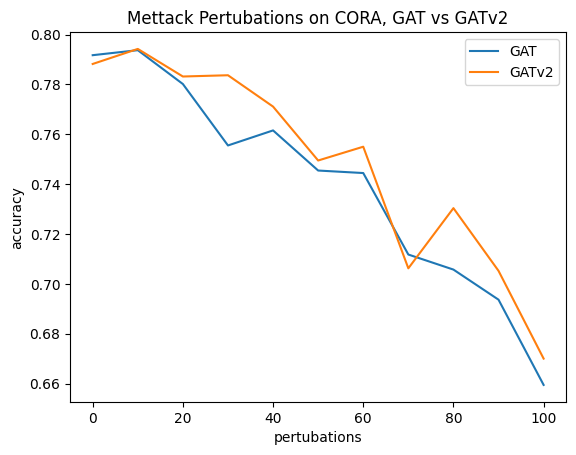

In [13]:
import matplotlib.pyplot as plt
plt.xlabel("pertubations")
plt.ylabel("accuracy")
plt.title("Mettack Pertubations on CORA, GAT vs GATv2")
plt.plot(idxs, gat_acc, label="GAT")
plt.plot(idxs, gat2_acc, label="GATv2")
plt.legend()